In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('dataset.xlsx')

In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

exploration data

In [5]:
df=data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

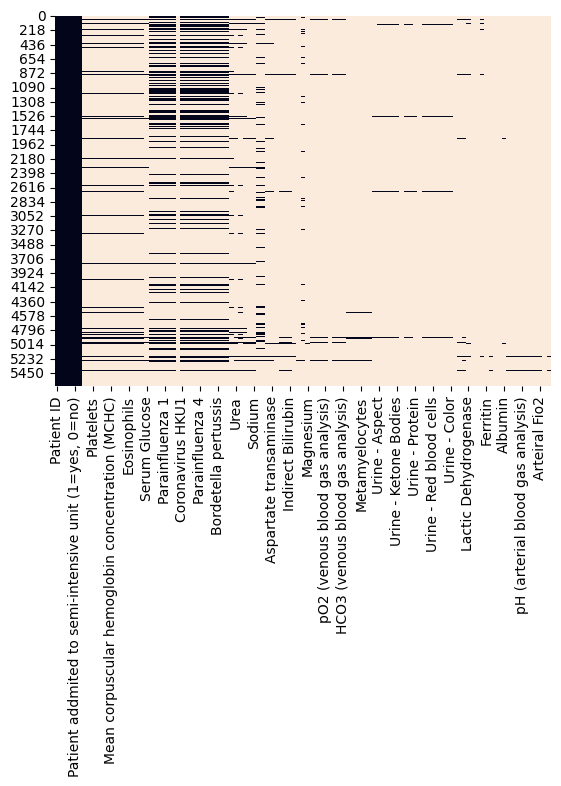

In [8]:
sns.heatmap(df.isna(),cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Urine - Sugar                                            1.000000
Mycoplasma pneumoniae                                    1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Phosphor                                                 0.996456
Arteiral Fio2                                            0.996456
Ferritin                                                 0.995925
Arterial Lactic Acid                                     0.995216
ctO2 (arterial blood gas analysis)                       0.995216
Hb saturat

==> barcha data naksaa ni7whaa 

In [10]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]


In [11]:
df=df.drop('Patient ID',axis=1)

<Axes: >

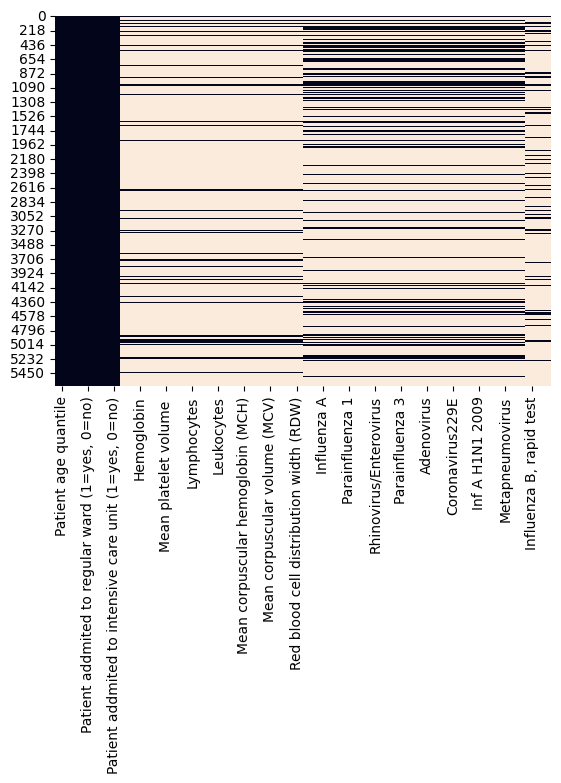

In [12]:
sns.heatmap(df.isna(),cbar=False)

target

In [13]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\azizm.AZIZ-PC\AppData\Local\T

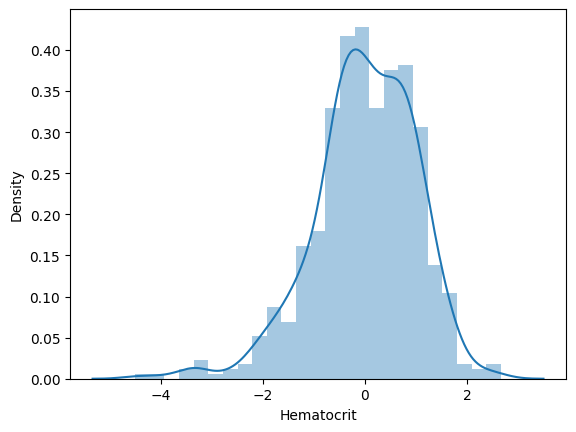

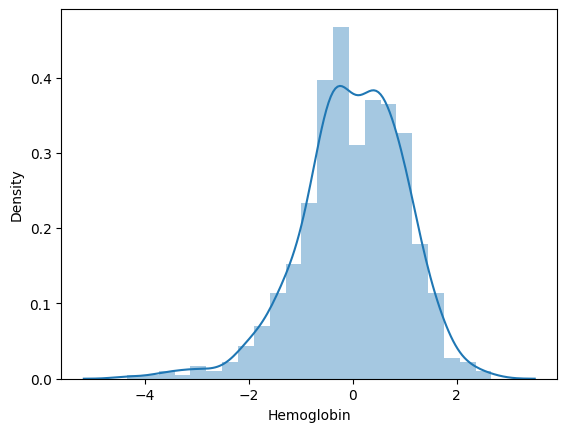

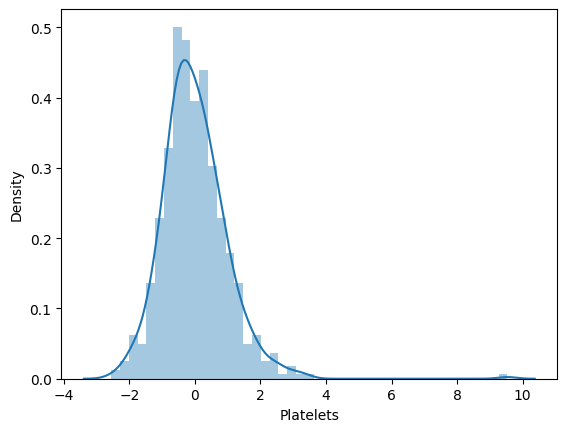

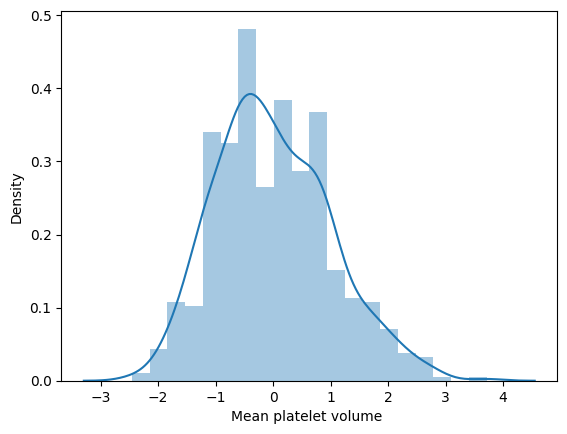

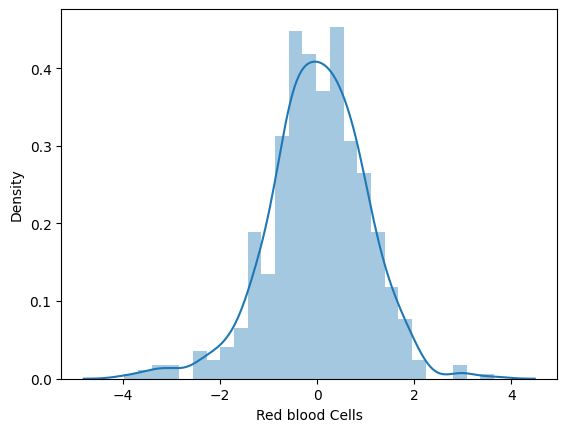

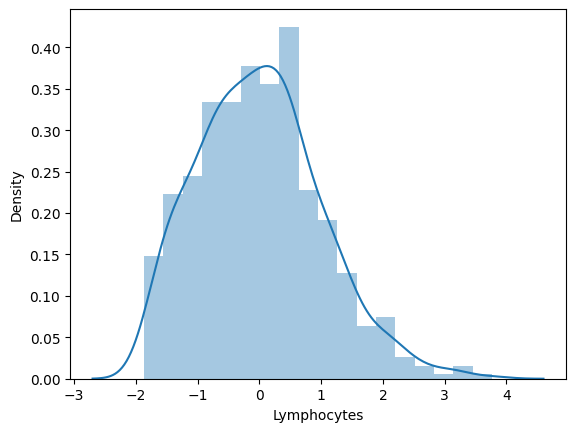

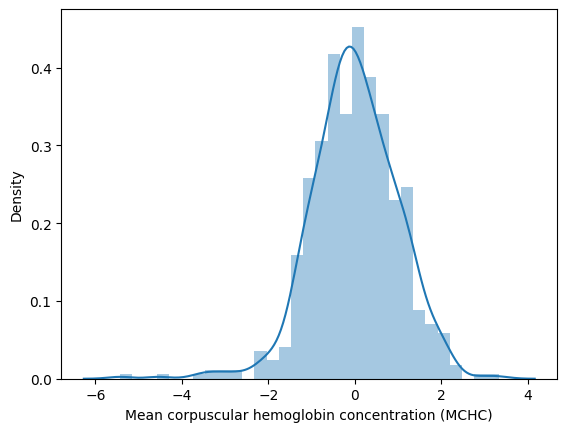

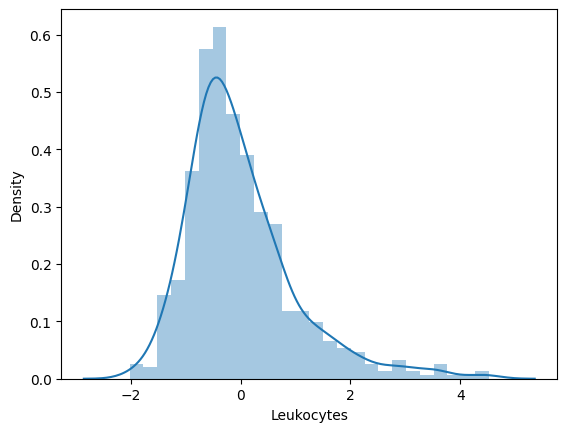

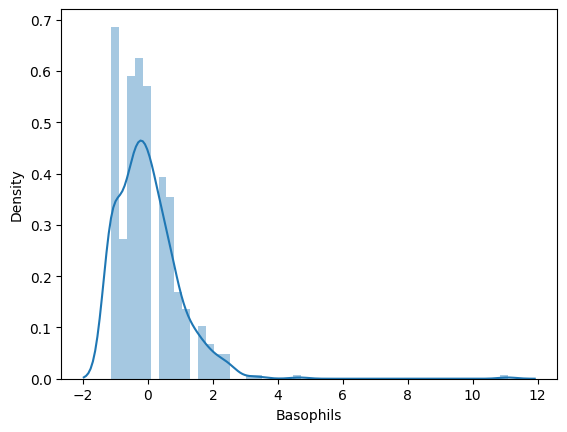

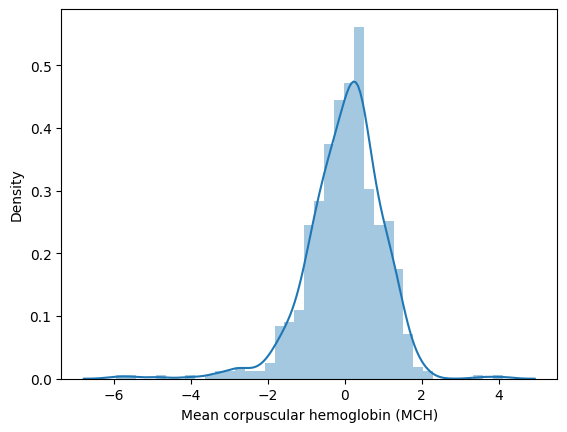

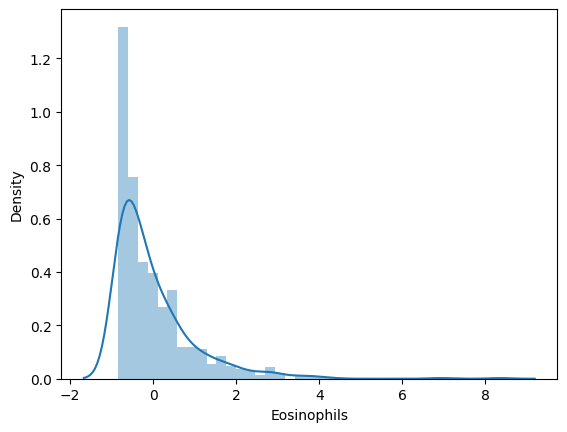

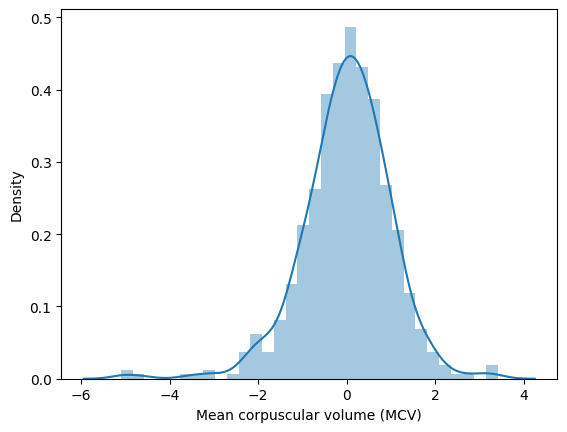

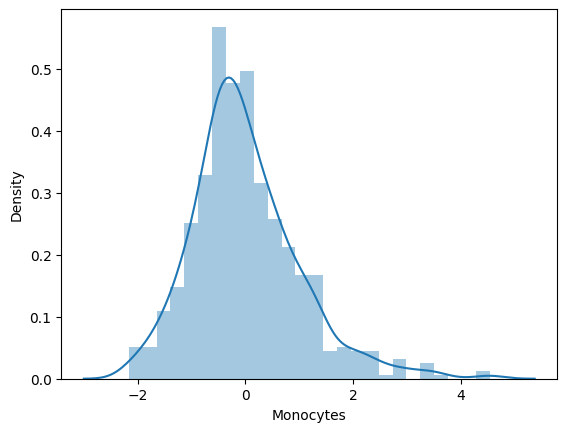

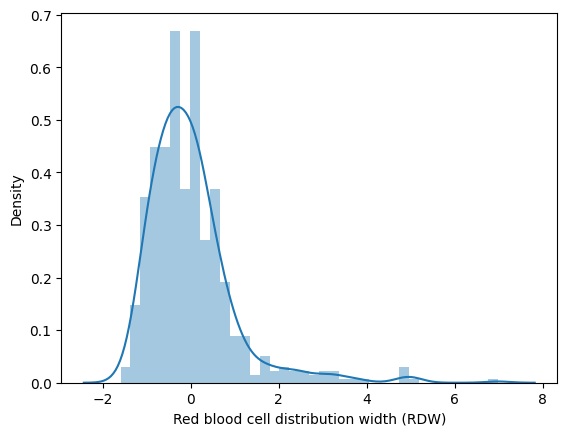

In [14]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\416077228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Patient age quantile'])


<Axes: xlabel='Patient age quantile', ylabel='Density'>

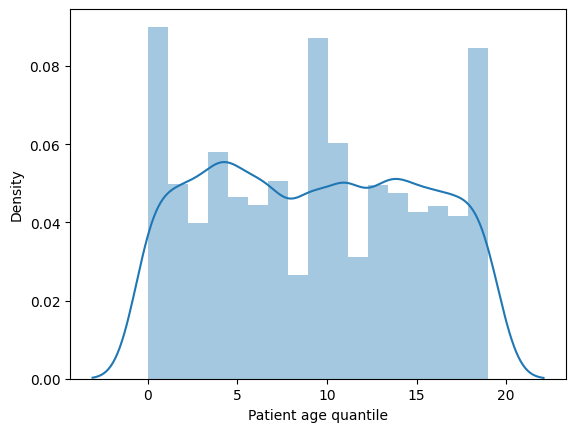

In [15]:
sns.distplot(df['Patient age quantile'])

In [16]:
df['Patient age quantile'].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

In [17]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

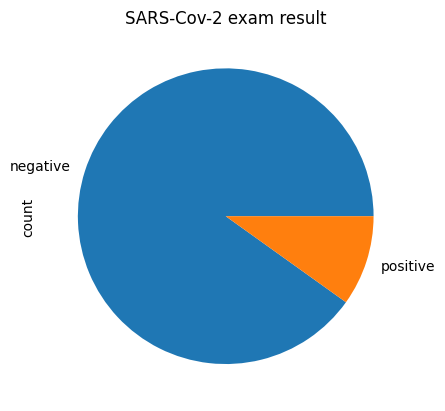

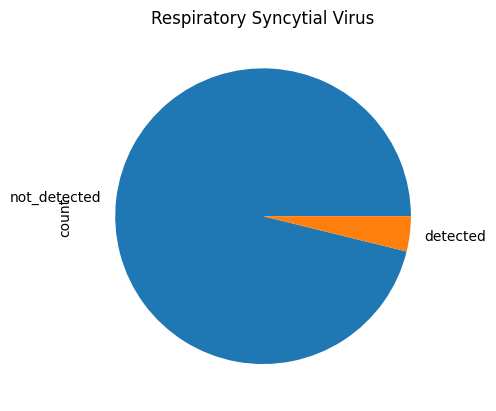

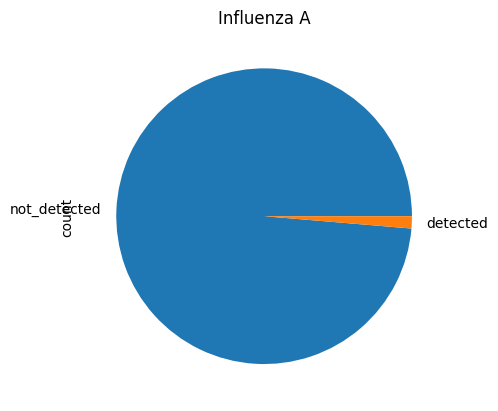

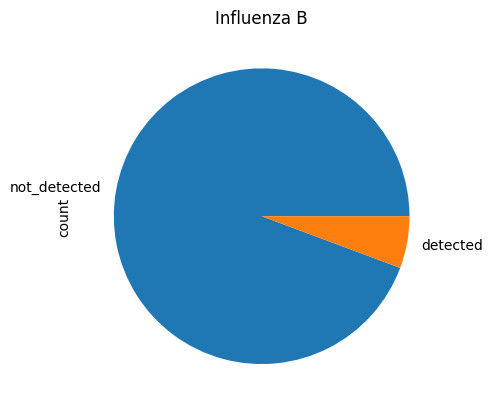

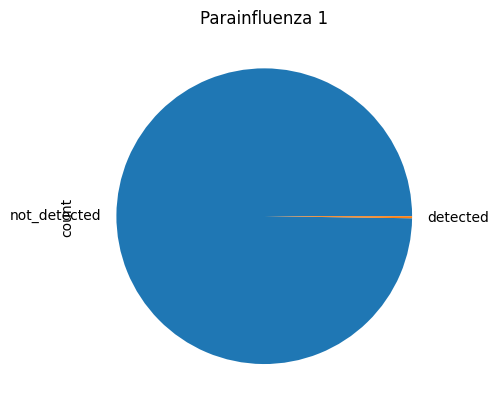

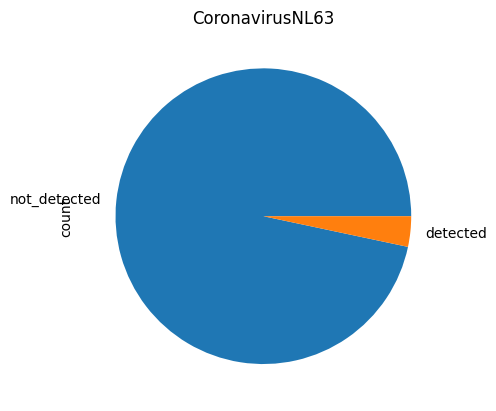

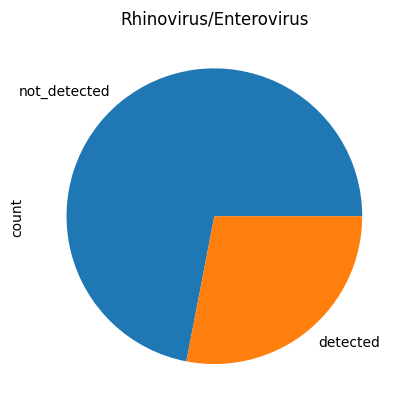

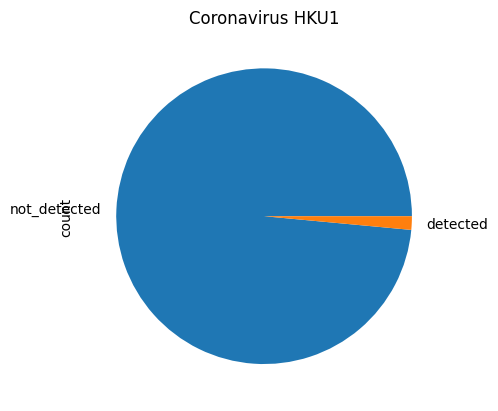

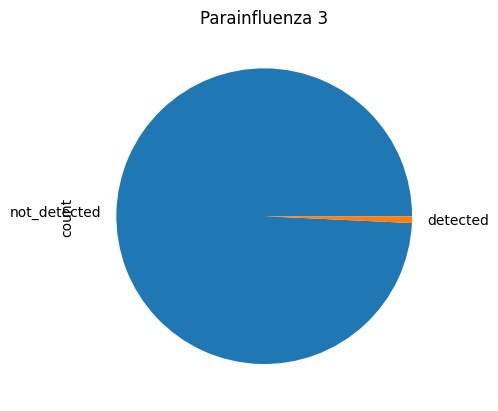

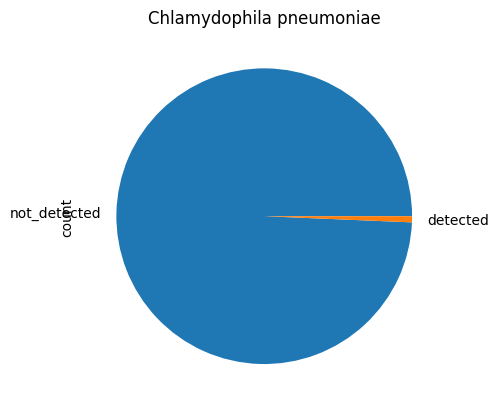

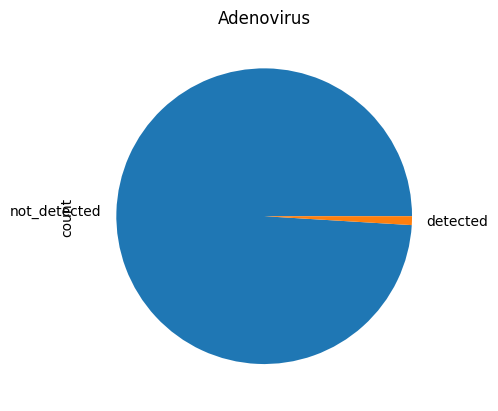

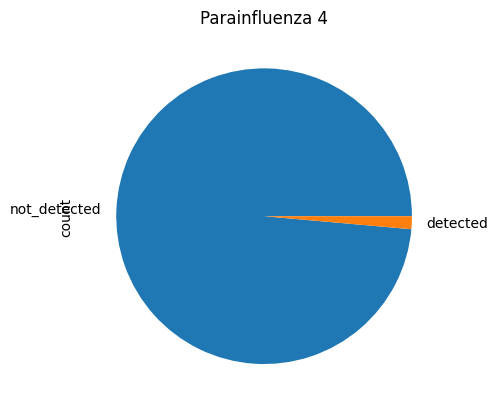

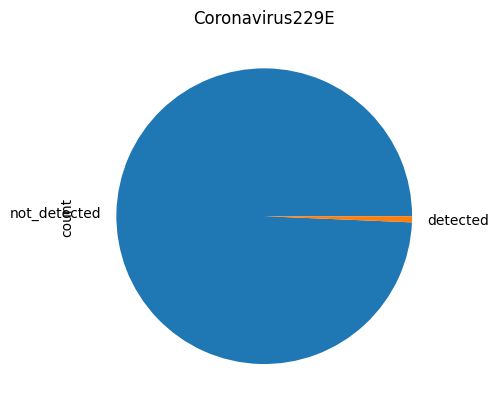

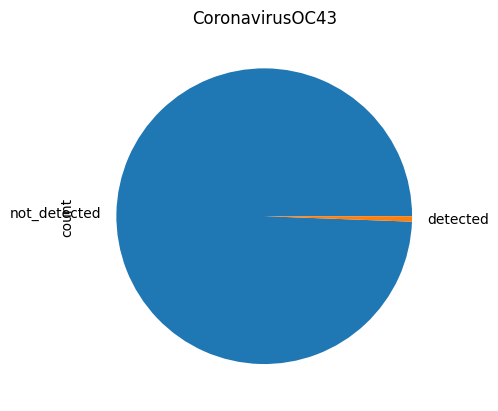

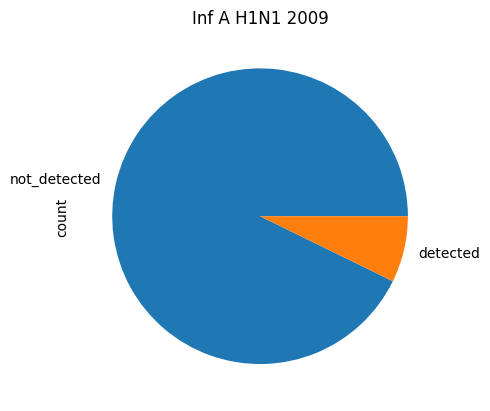

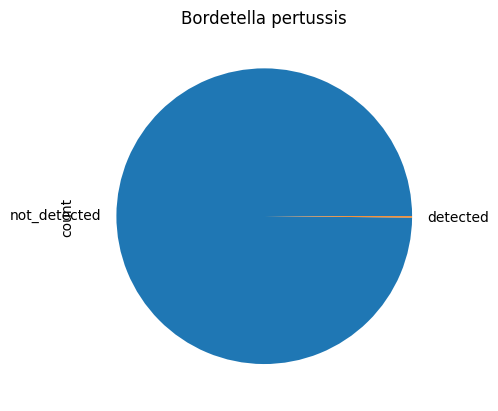

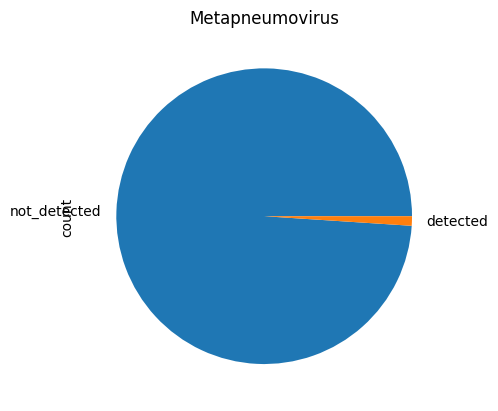

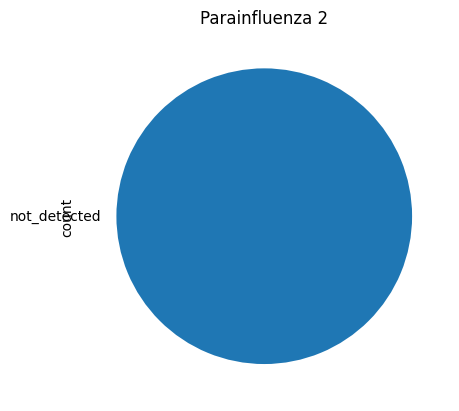

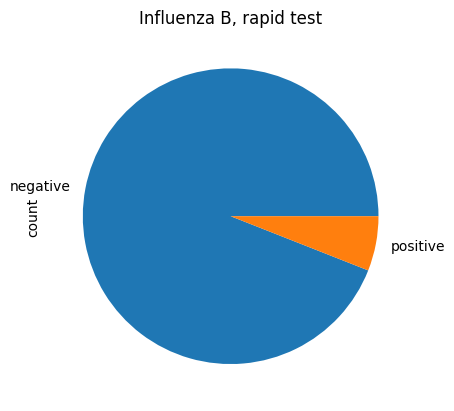

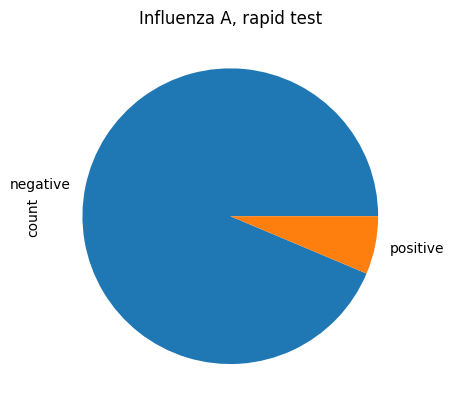

In [18]:
for col in df.select_dtypes('object'):
    plt.figure()
    plt.title(col)
    df[col].value_counts().plot.pie()

relation target /variables

In [19]:
positive_df=df[df['SARS-Cov-2 exam result']=='positive']

In [20]:
negative_df=df[df['SARS-Cov-2 exam result']=='negative']

In [21]:
missing_rate=df.isna().sum()/df.shape[0]

In [22]:
blood_column=df.columns[(missing_rate<0.9) & (missing_rate>0.88)]
viral_column=df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

target/blood

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\3500578138.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive')
C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\3500578138.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],labe

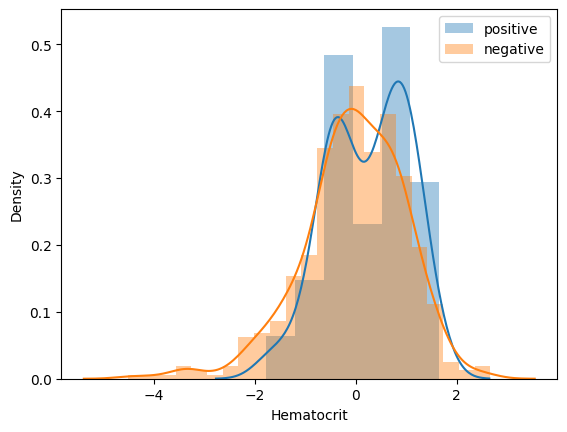

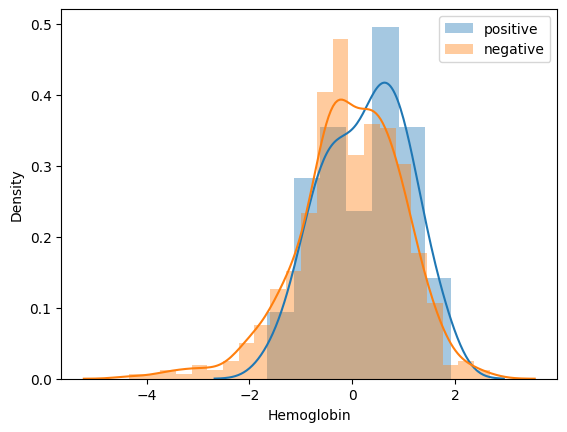

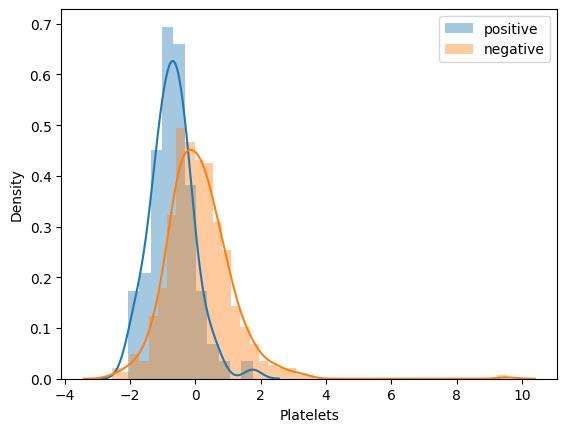

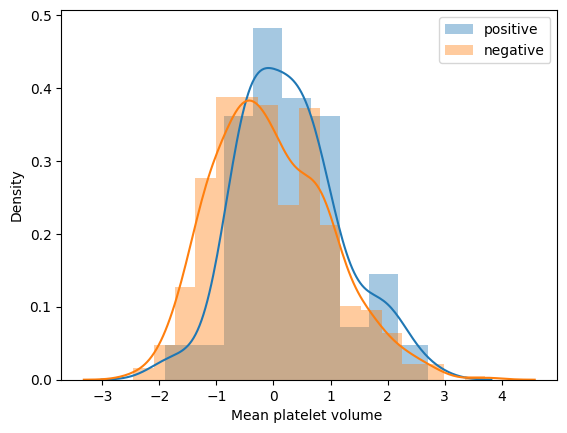

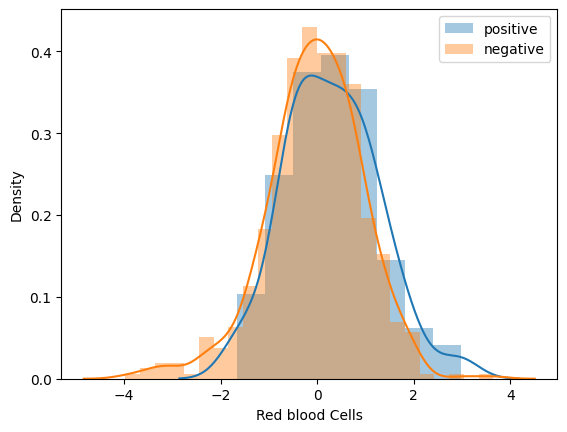

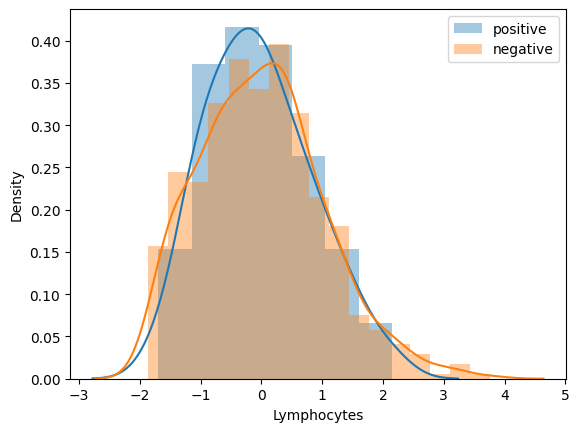

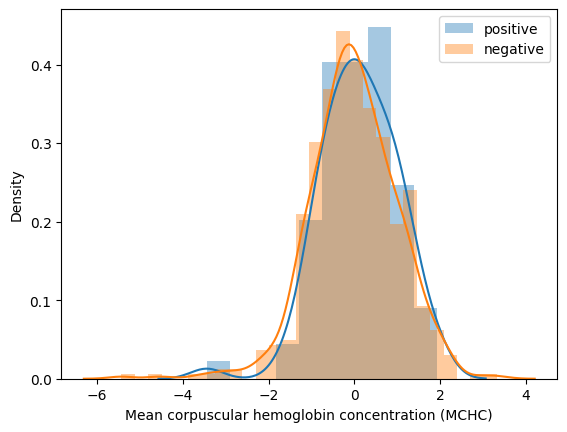

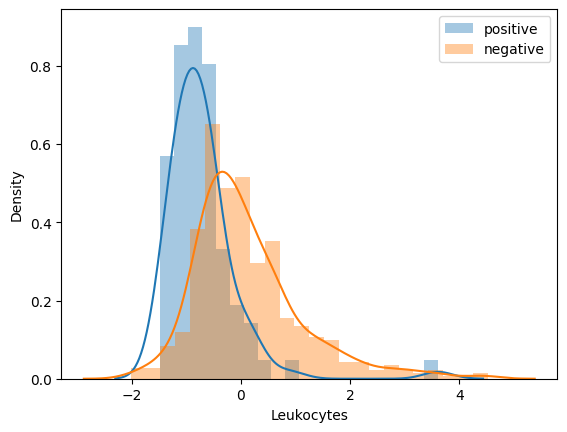

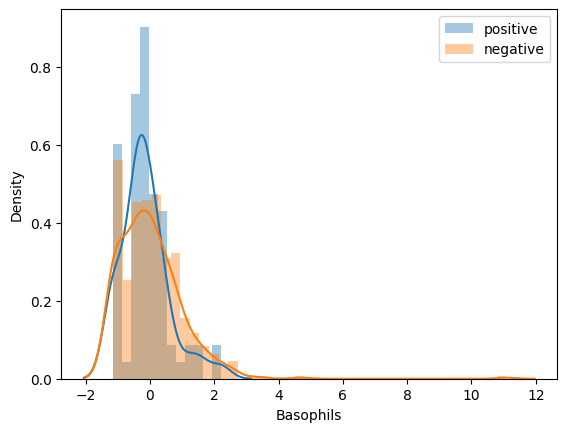

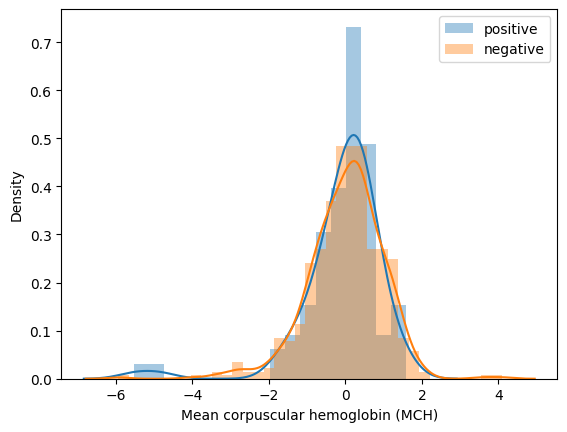

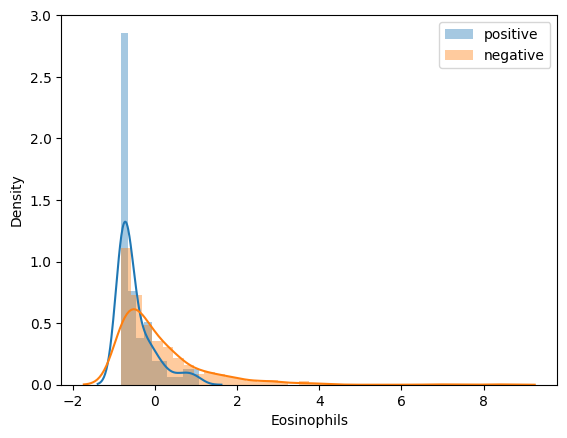

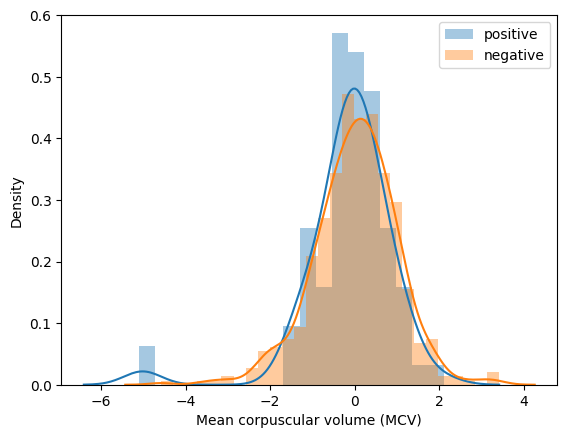

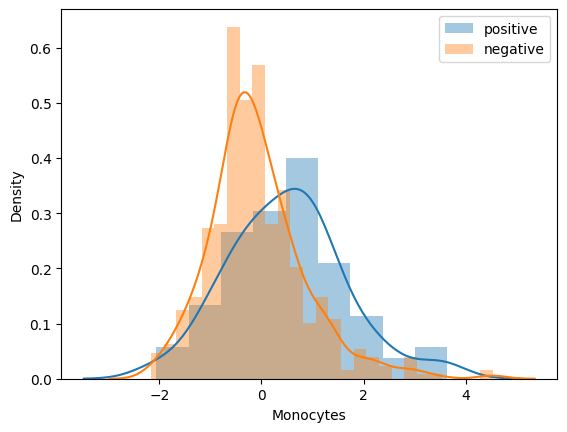

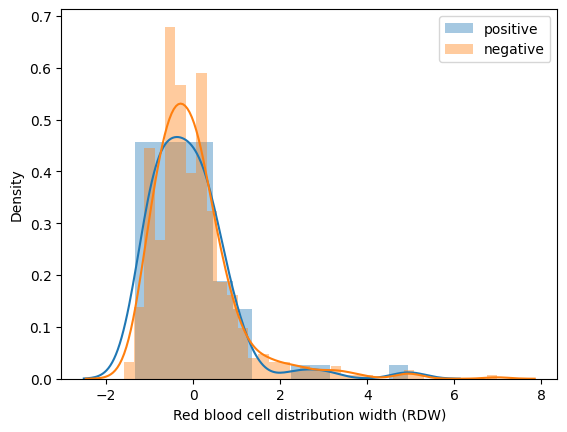

In [23]:
for col in blood_column:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

target/age

<Axes: xlabel='Patient age quantile', ylabel='count'>

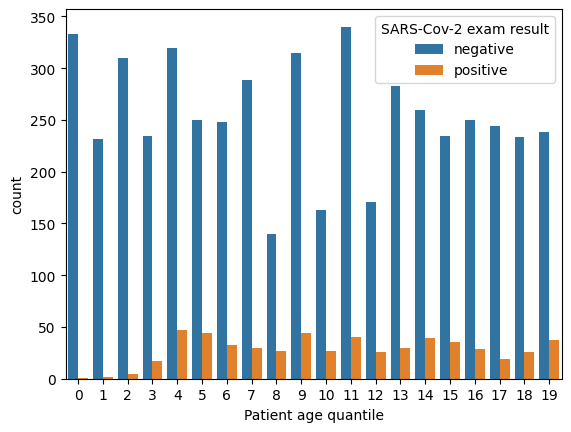

In [24]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

target/viral   

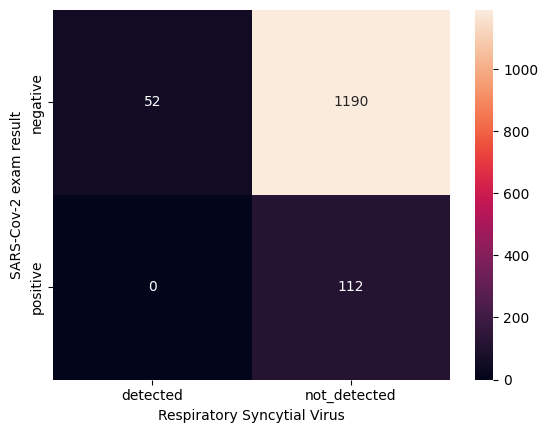

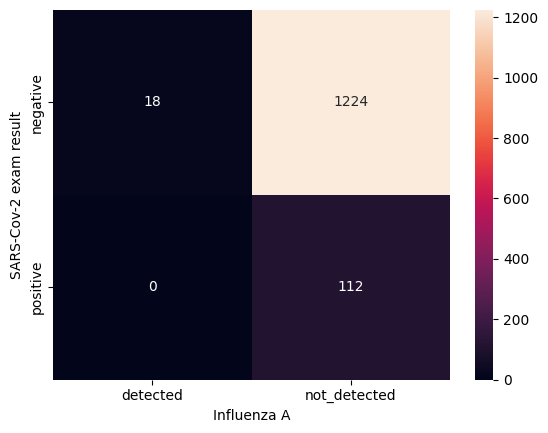

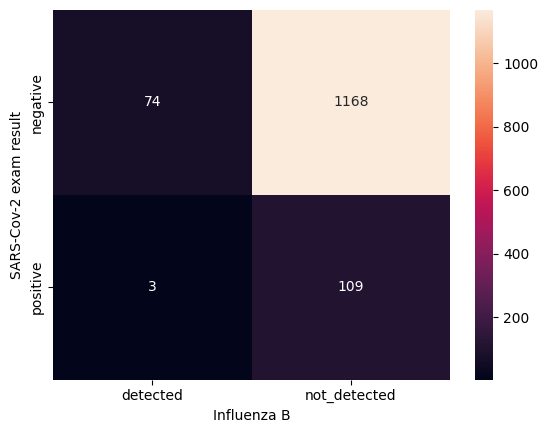

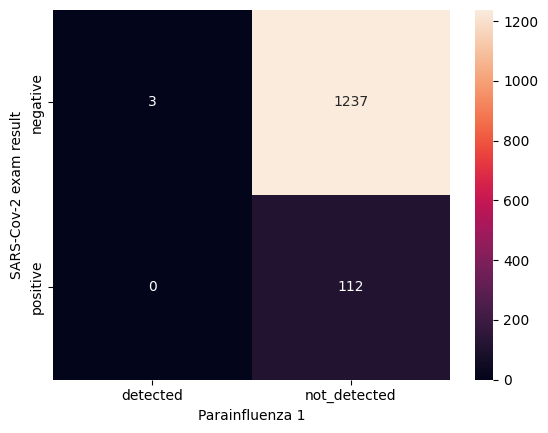

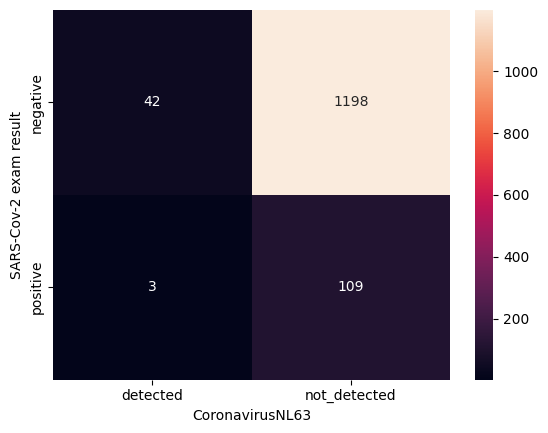

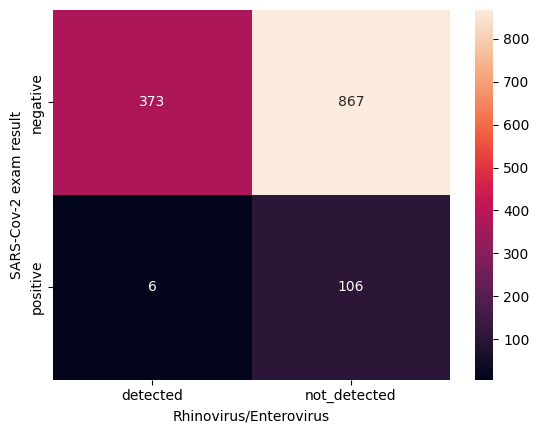

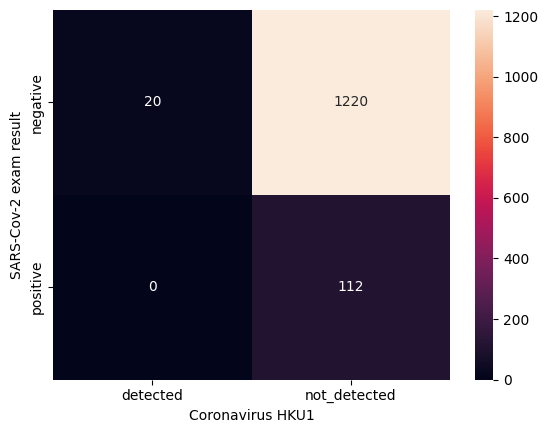

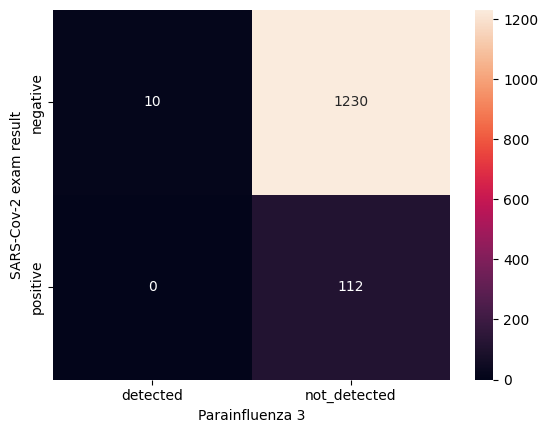

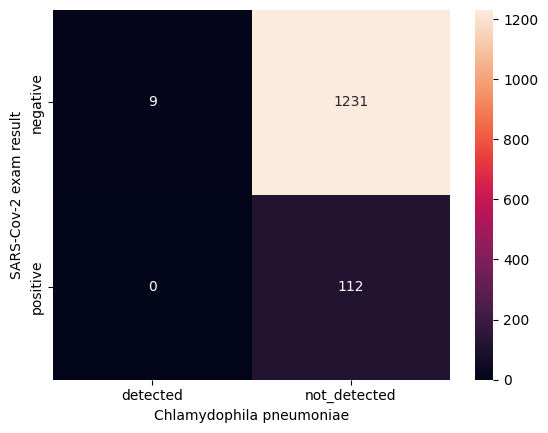

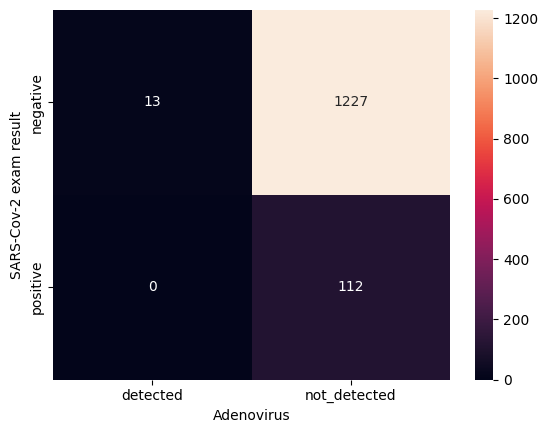

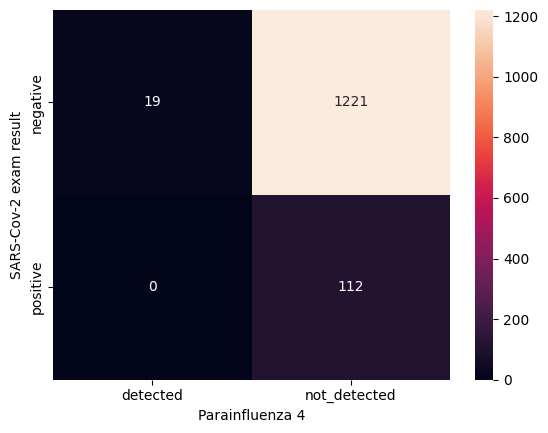

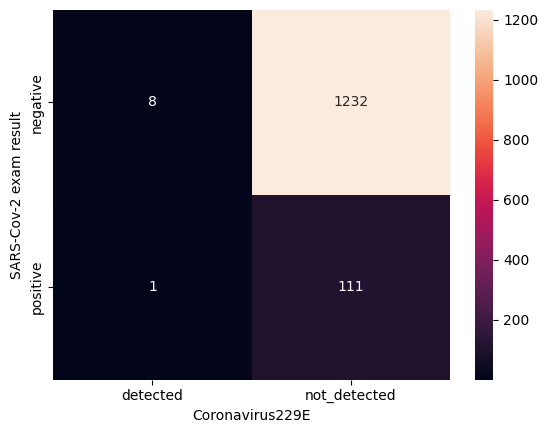

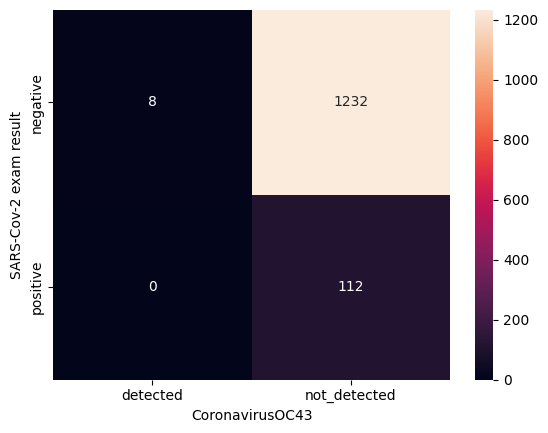

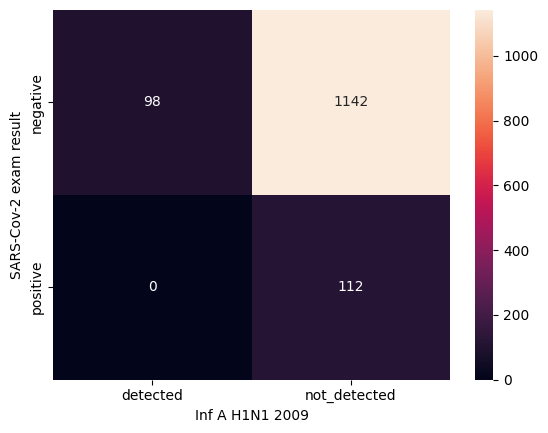

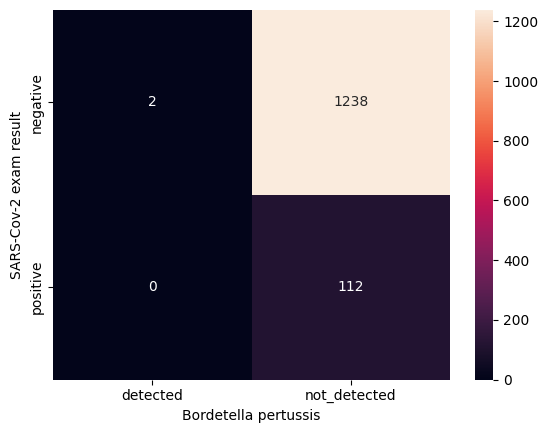

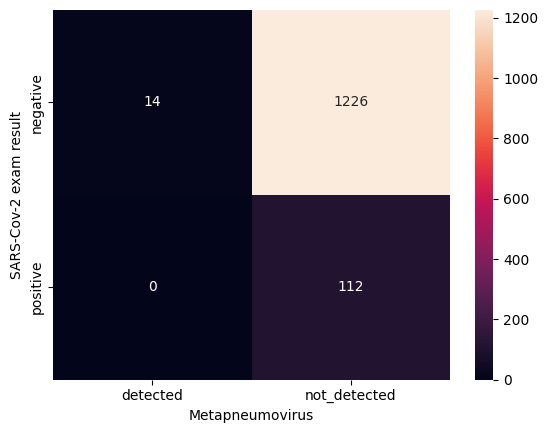

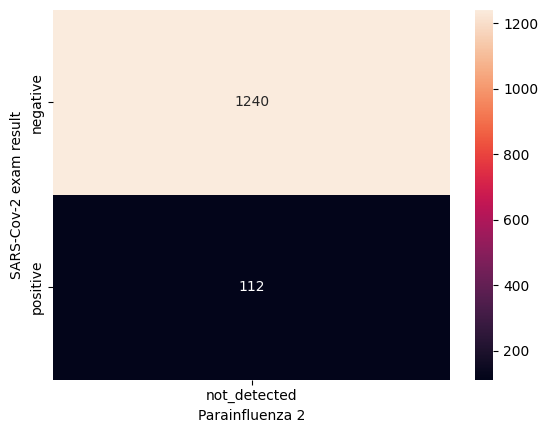

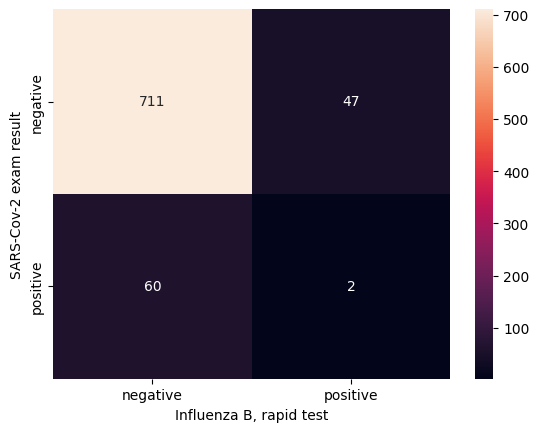

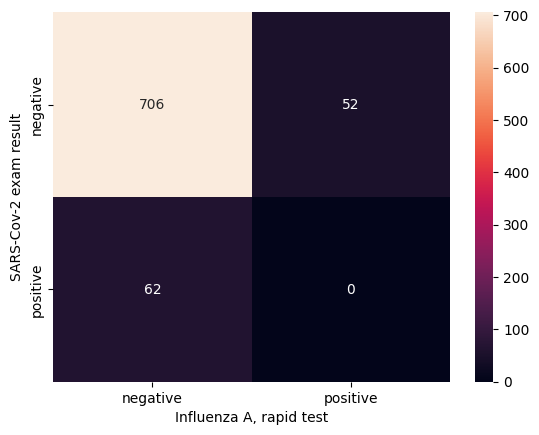

In [25]:
for col in viral_column:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')



variable/variable

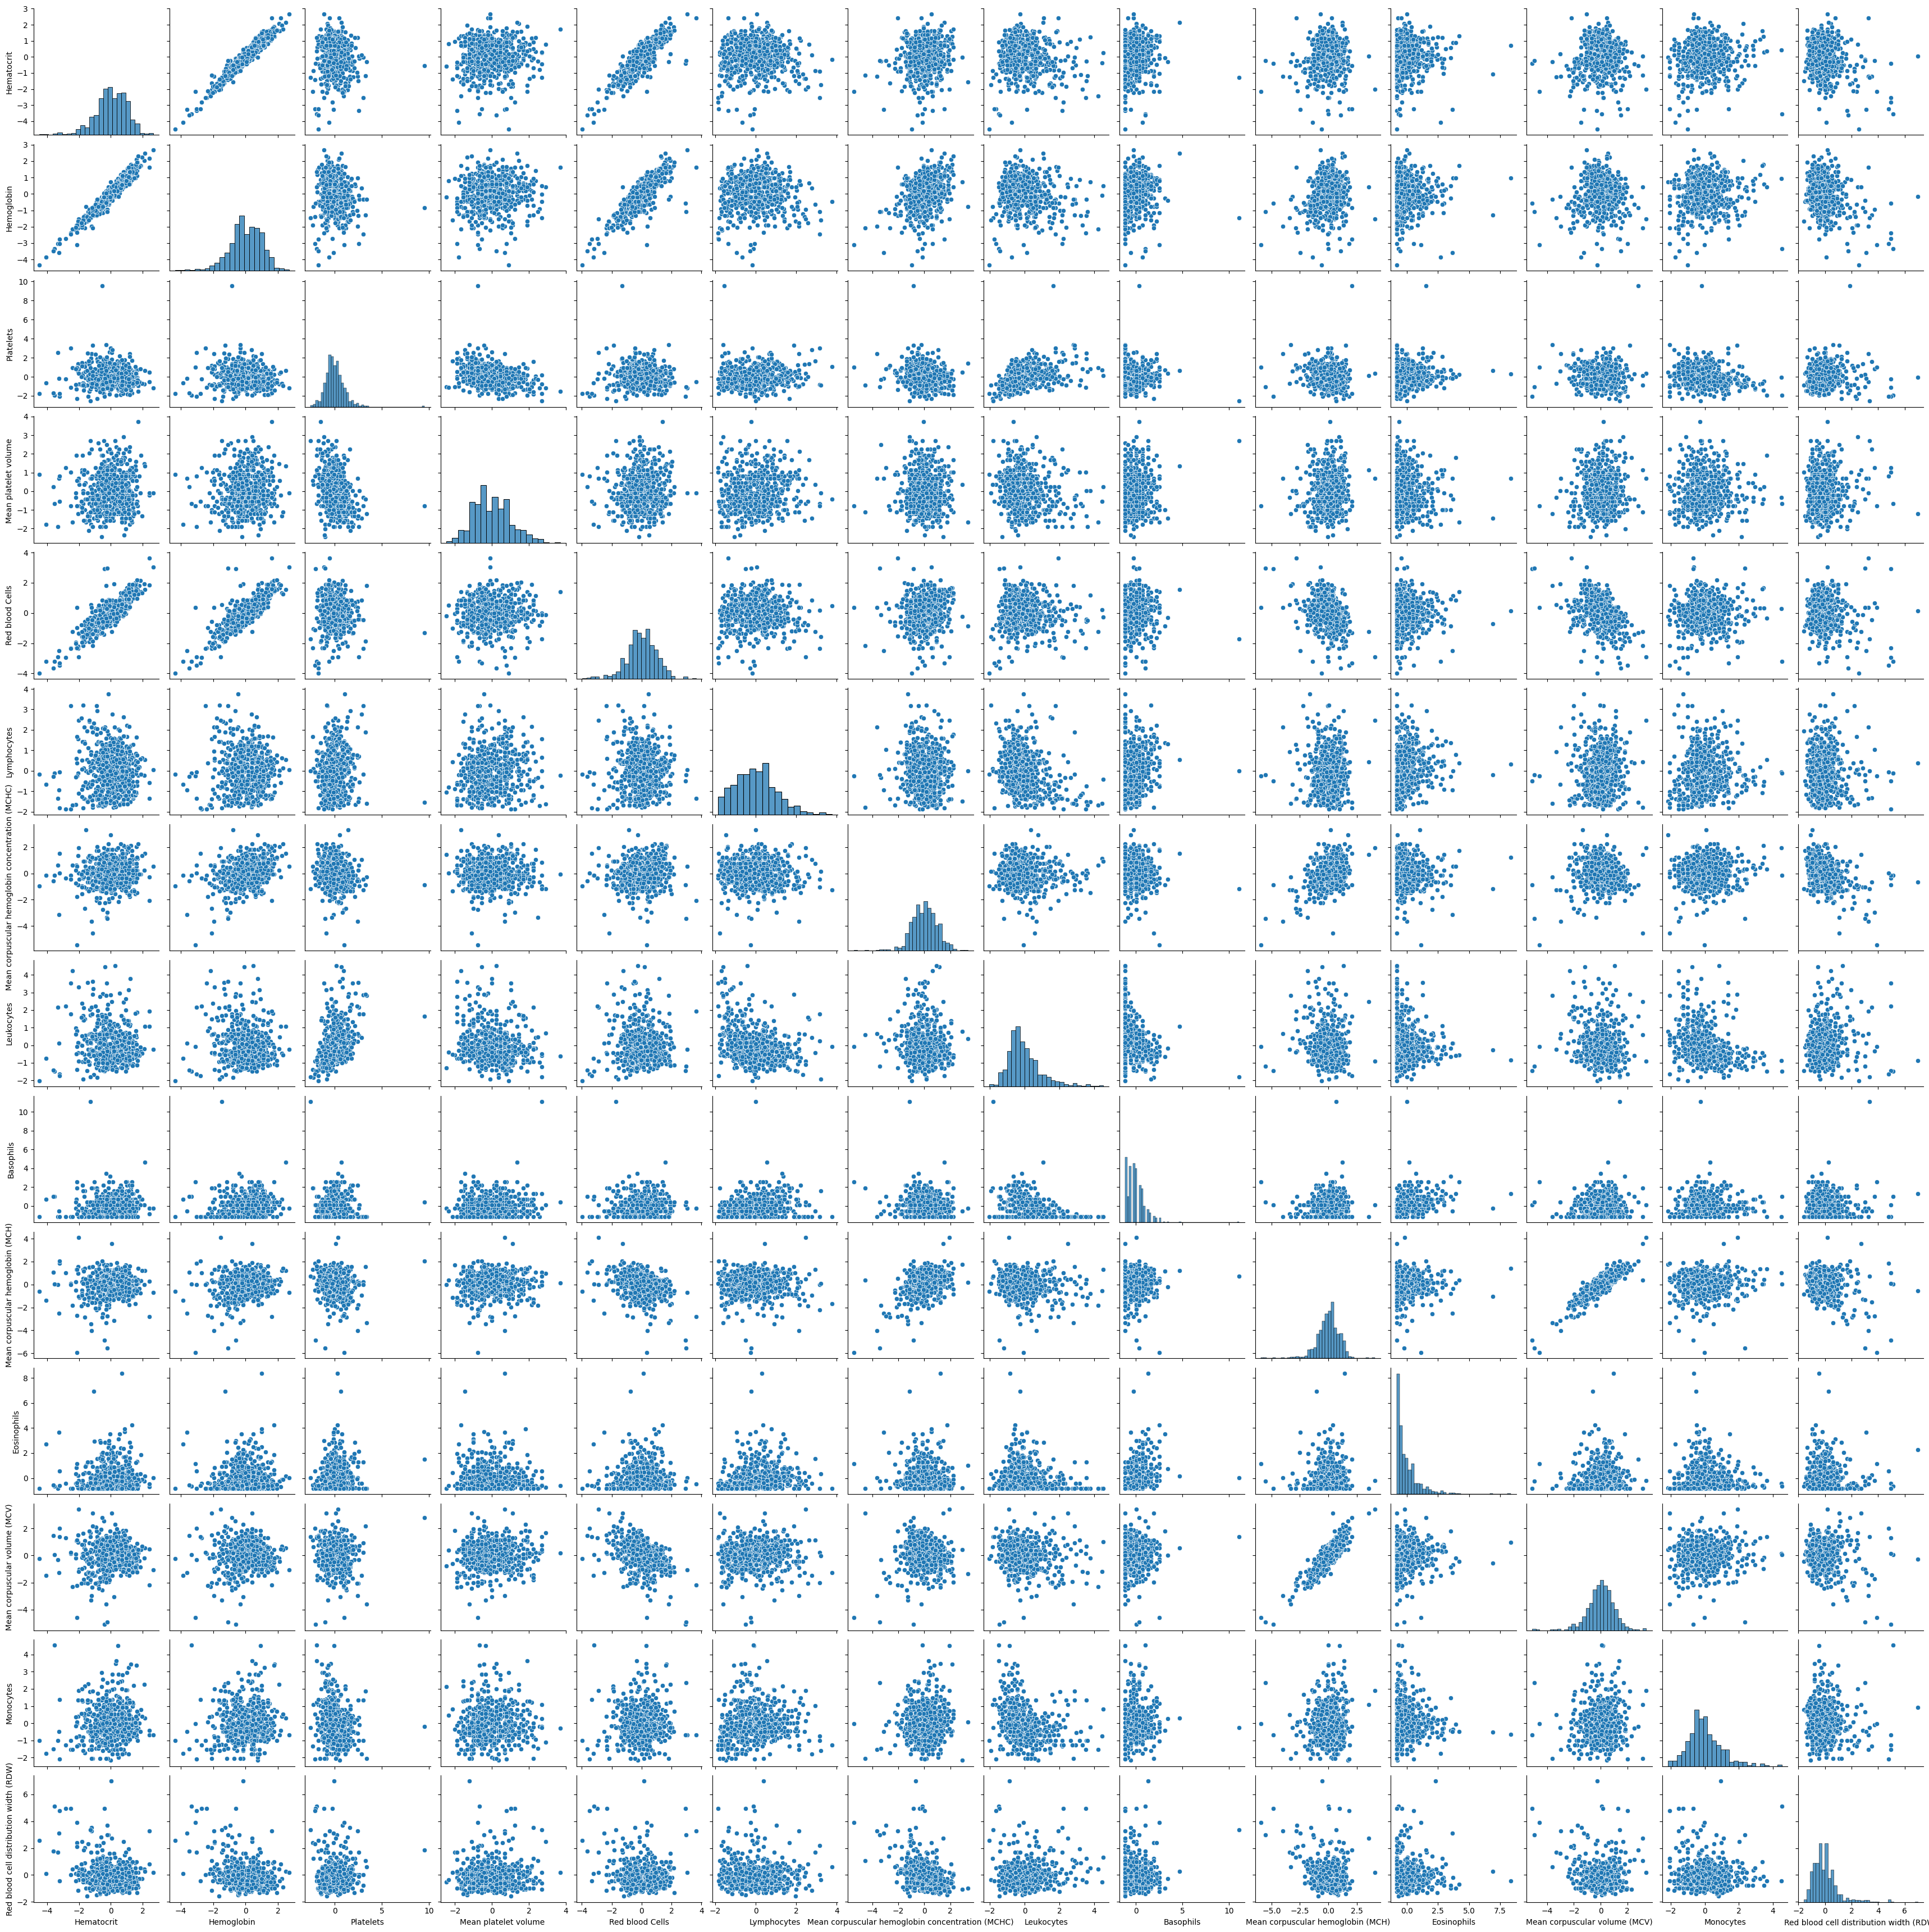

In [26]:
sns.pairplot(df[blood_column])

<Axes: >

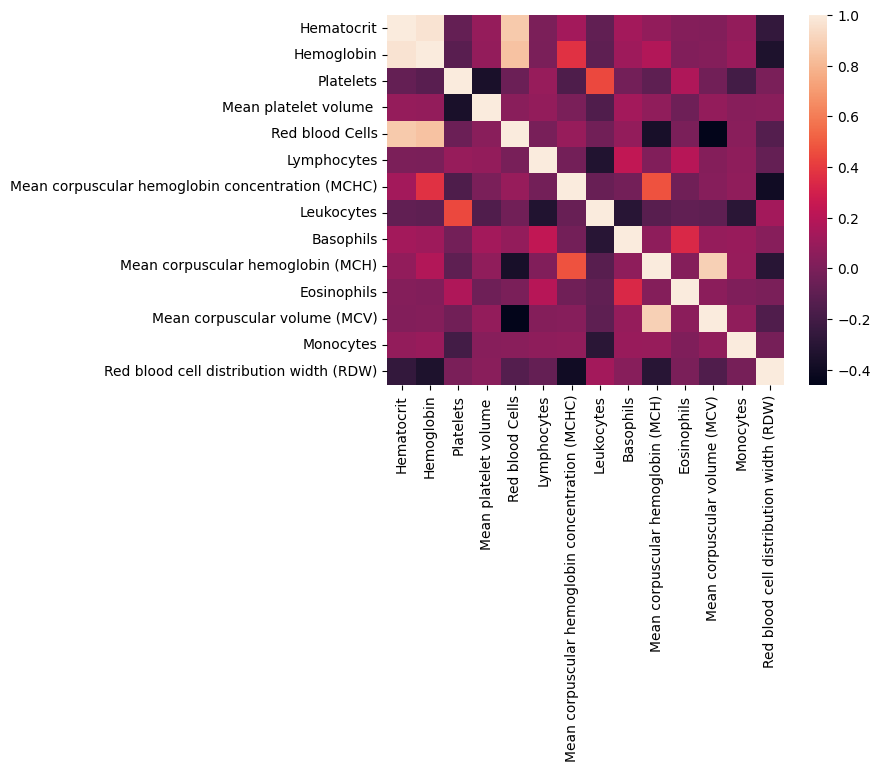

In [28]:
sns.heatmap(df[blood_column].corr())

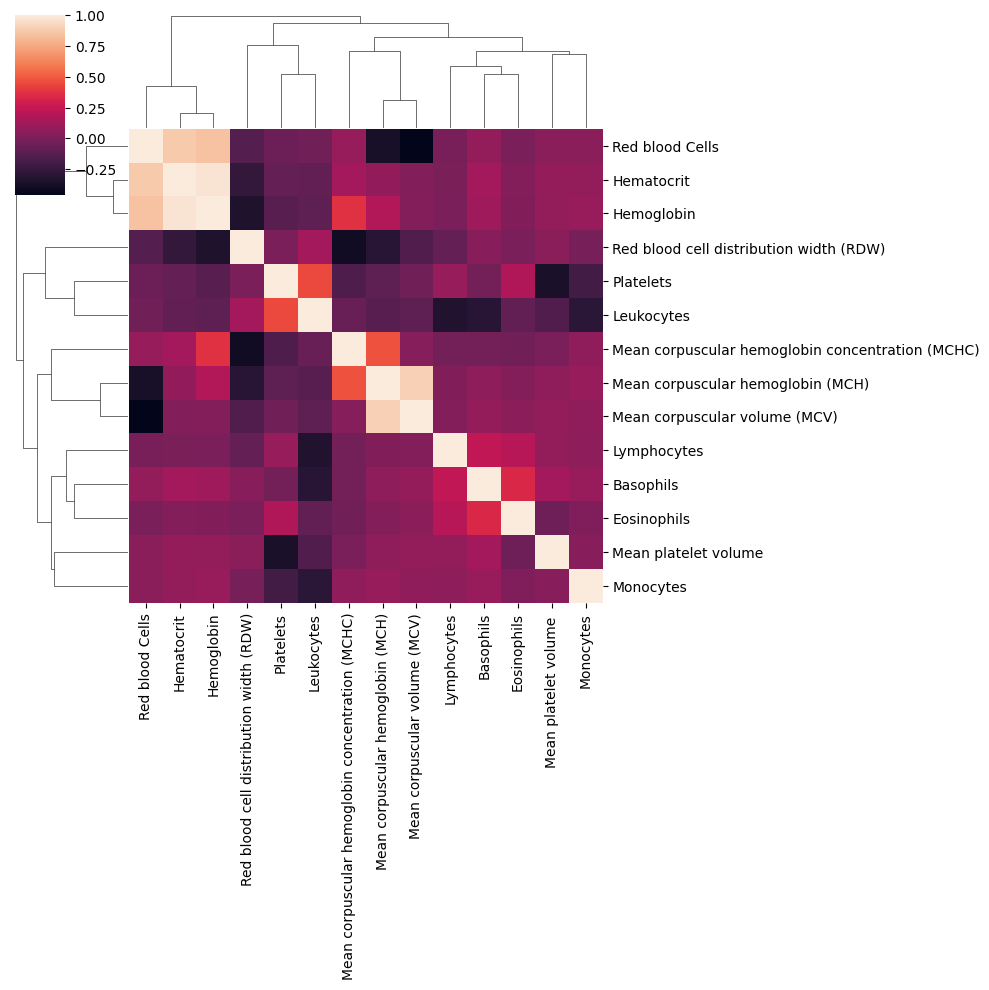

In [29]:
sns.clustermap(df[blood_column].corr())

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\1381150084.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

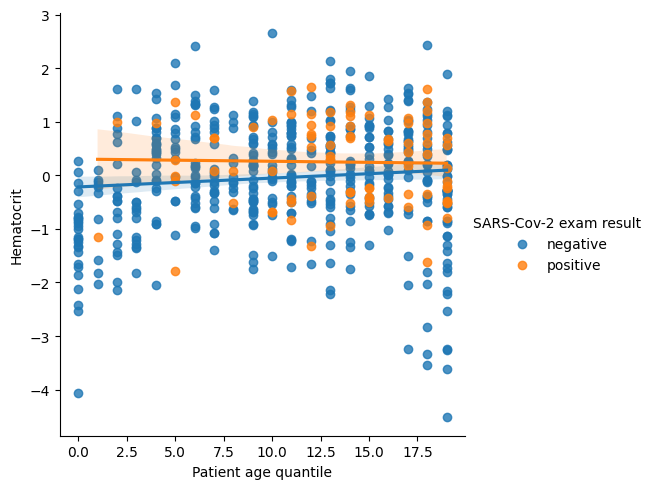

<Figure size 640x480 with 0 Axes>

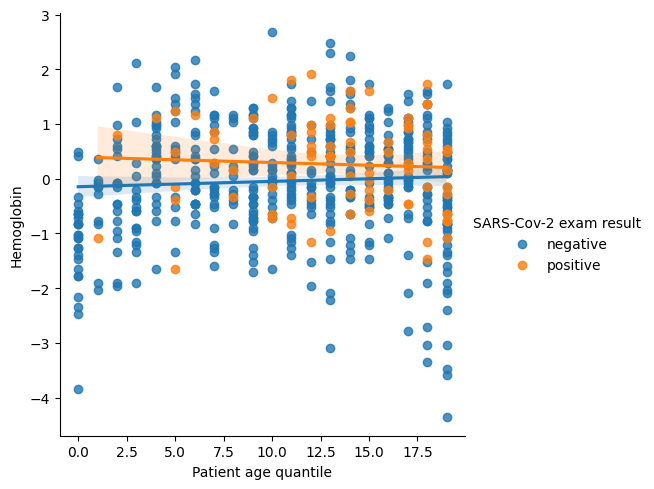

<Figure size 640x480 with 0 Axes>

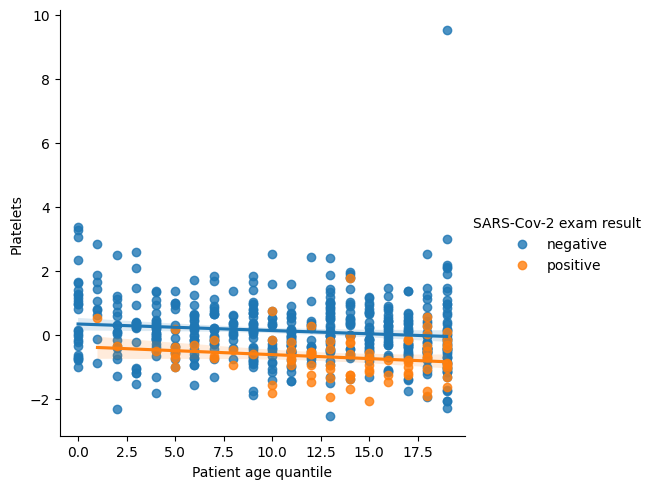

<Figure size 640x480 with 0 Axes>

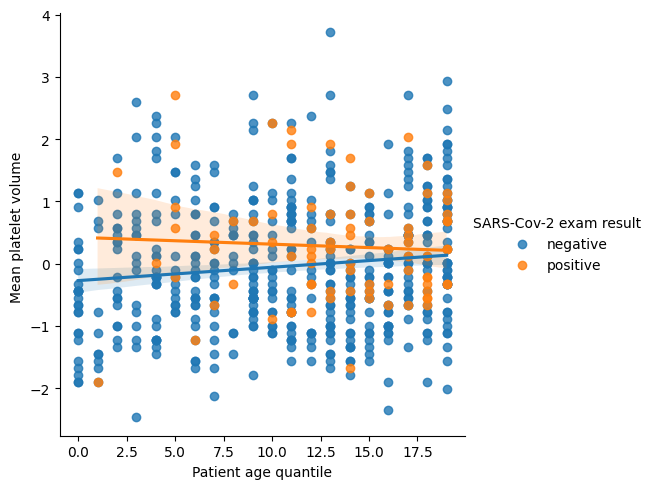

<Figure size 640x480 with 0 Axes>

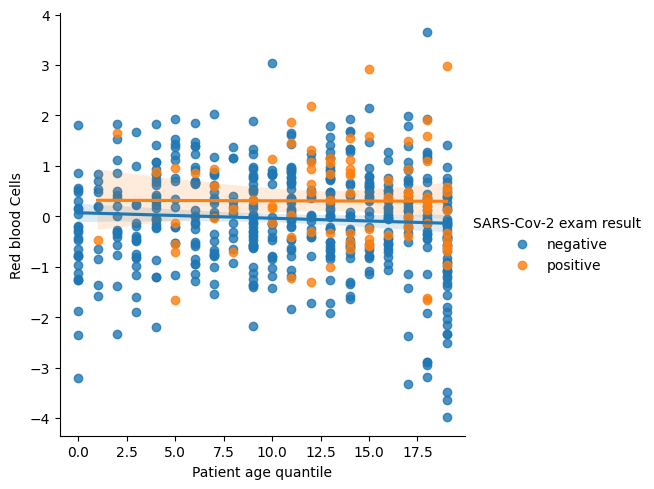

<Figure size 640x480 with 0 Axes>

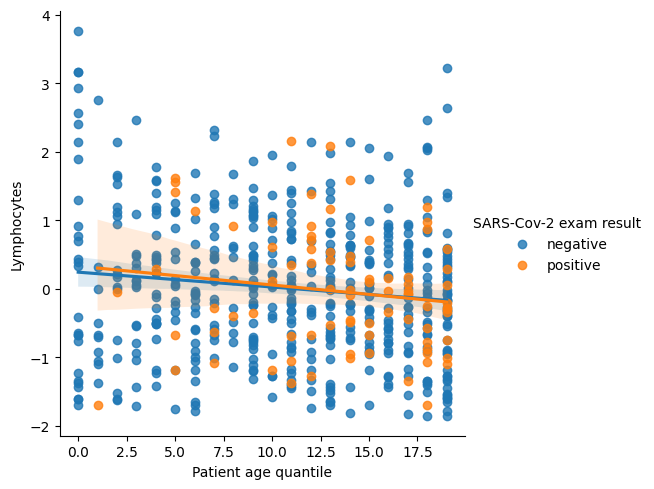

<Figure size 640x480 with 0 Axes>

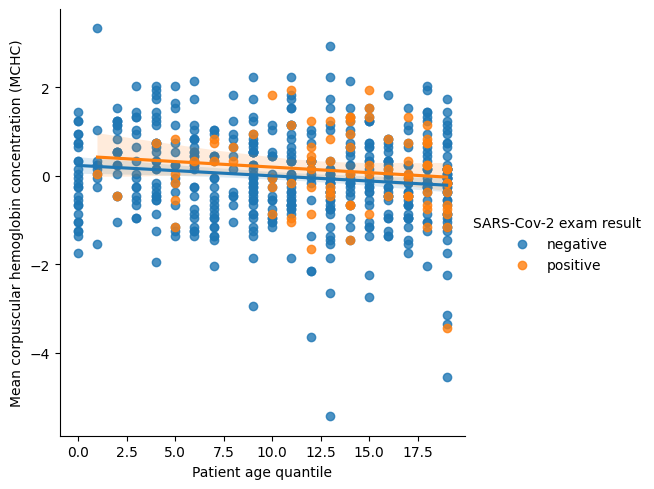

<Figure size 640x480 with 0 Axes>

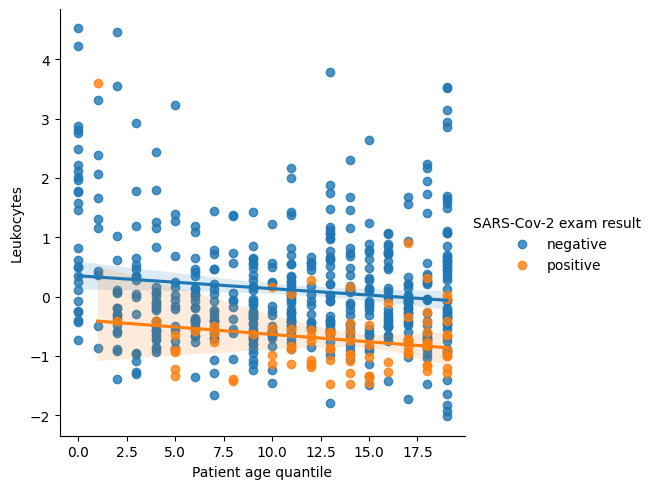

<Figure size 640x480 with 0 Axes>

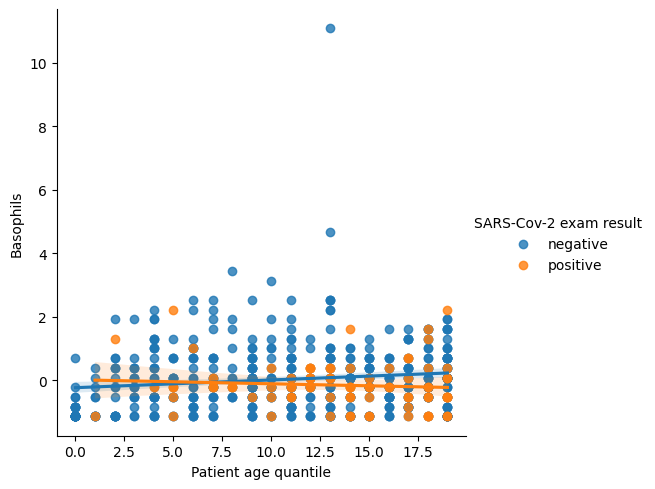

<Figure size 640x480 with 0 Axes>

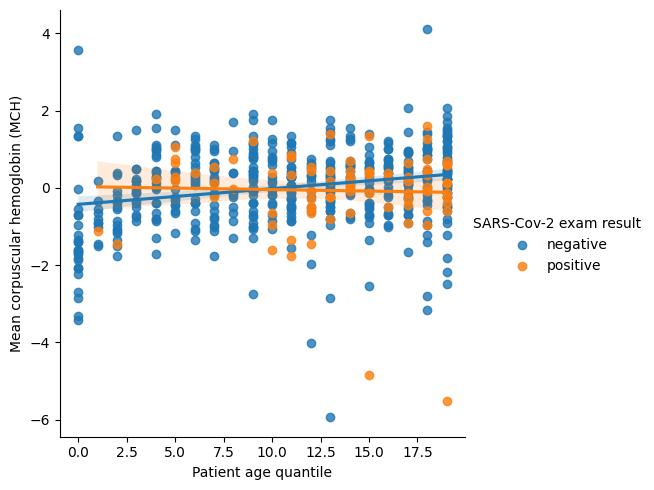

<Figure size 640x480 with 0 Axes>

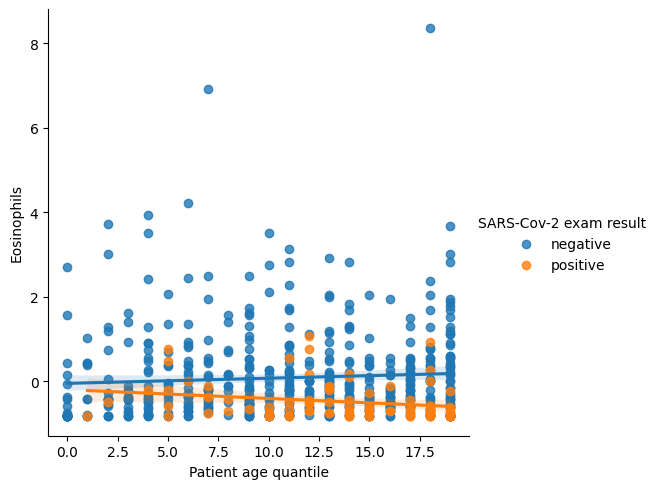

<Figure size 640x480 with 0 Axes>

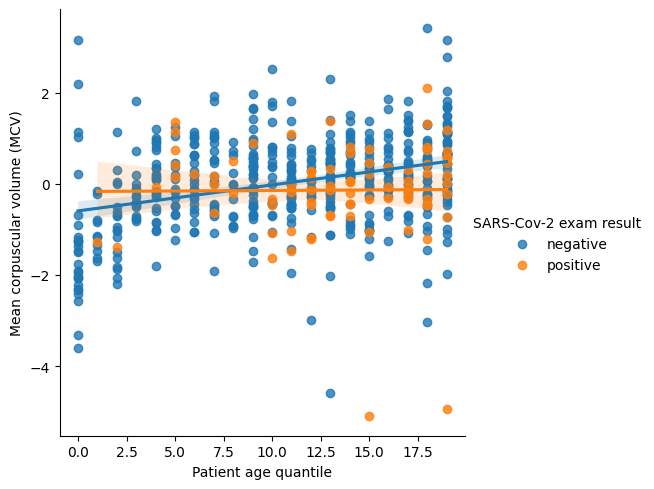

<Figure size 640x480 with 0 Axes>

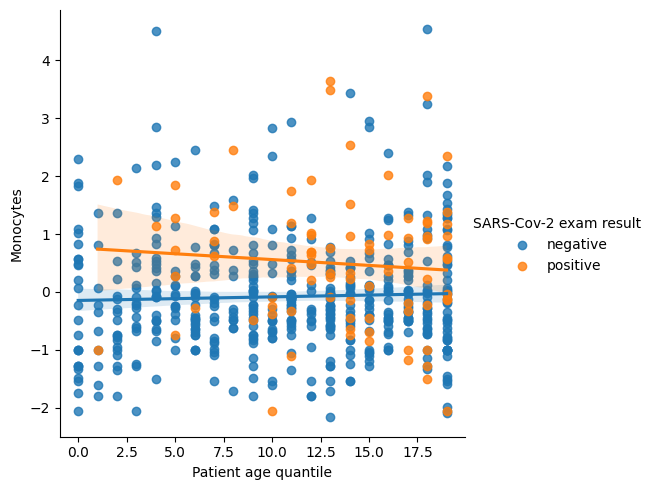

<Figure size 640x480 with 0 Axes>

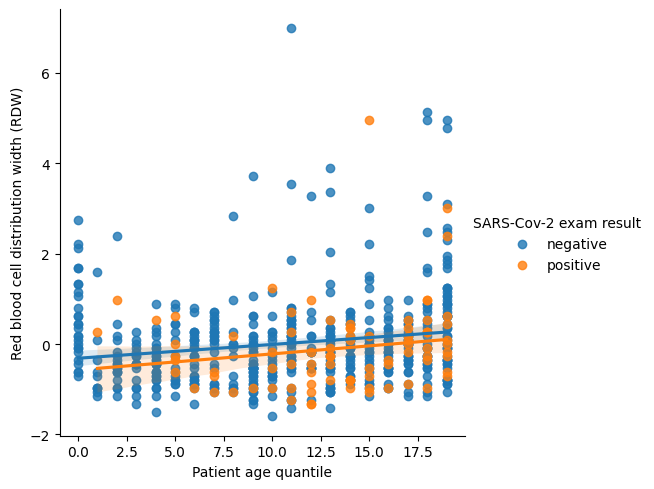

In [30]:
for col in blood_column:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)

faible correlation age/blood

In [42]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [43]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

les tests mouch tayrinn

In [47]:
df['est malade']=np.sum(df[viral_column[:-2]]=='detected',axis=1)>=1

In [48]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [49]:
malade_df=df[df['est malade']==True]
non_malade_df=df[df['est malade']==False]

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\3077300457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col],label='malade')
C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\3077300457.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col],label=

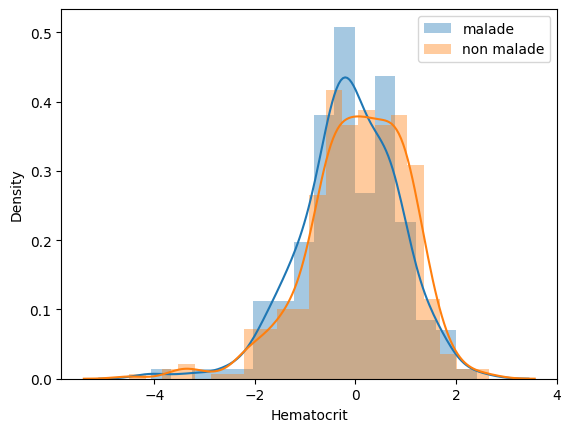

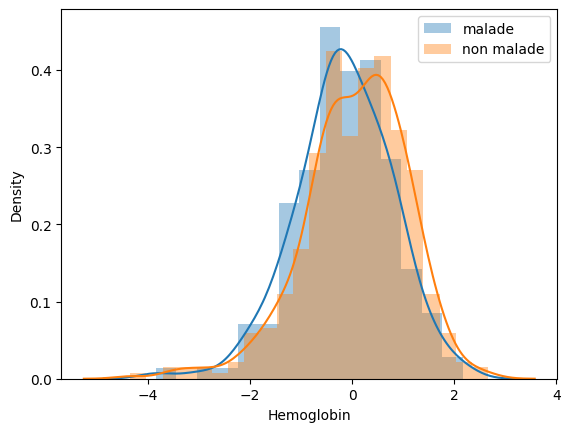

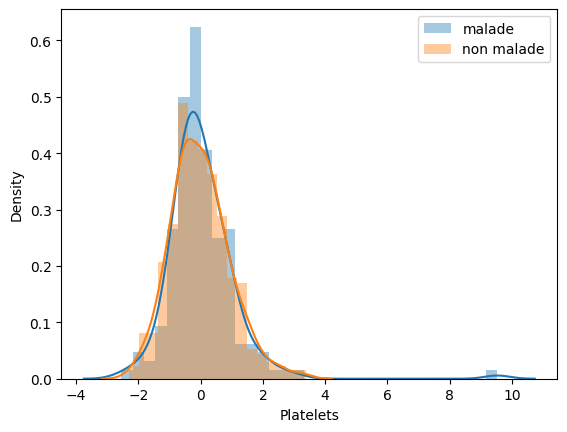

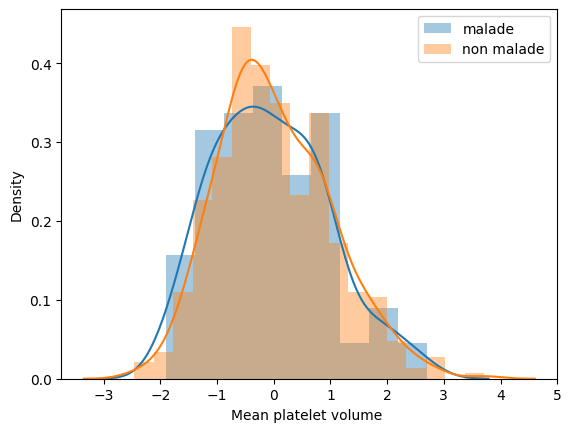

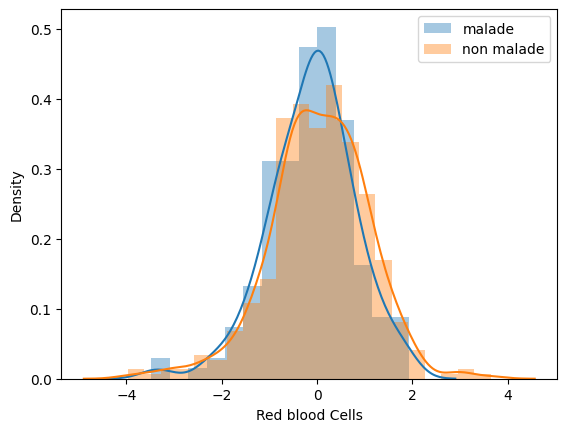

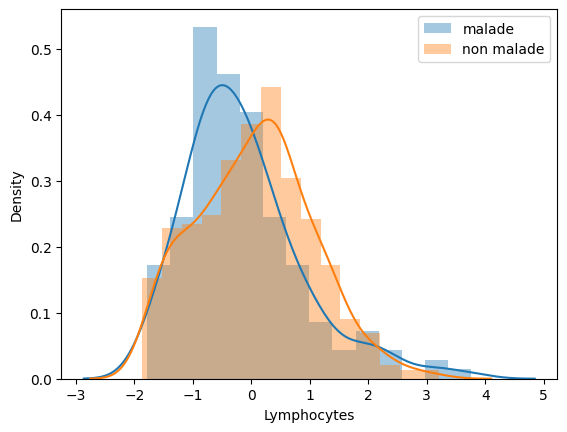

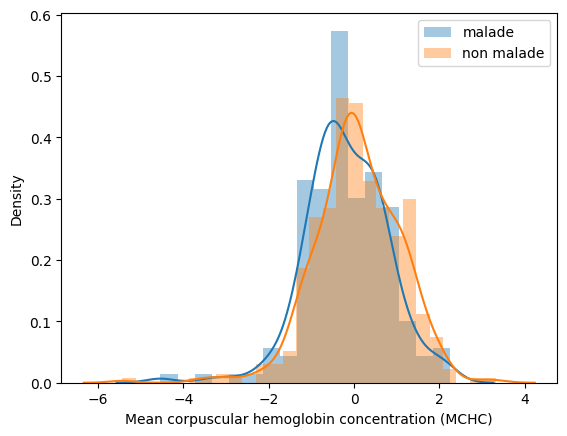

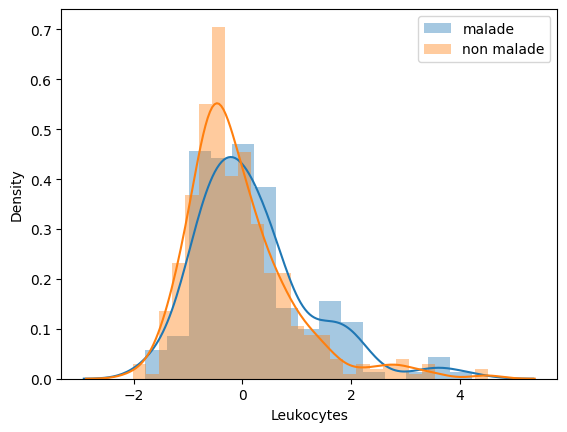

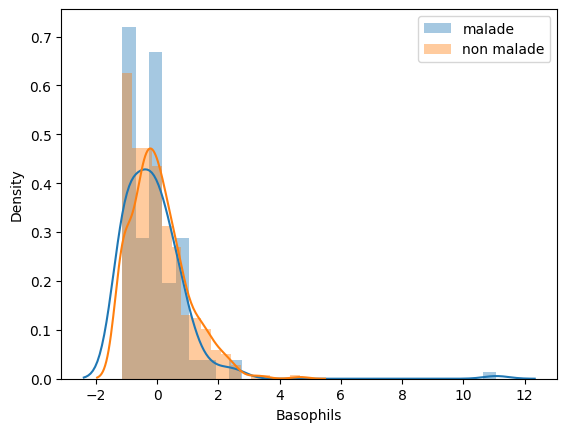

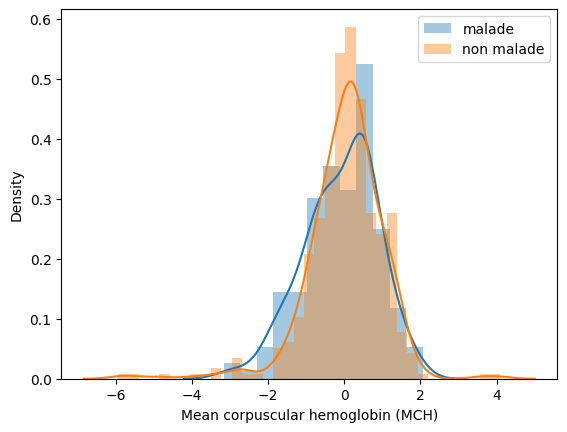

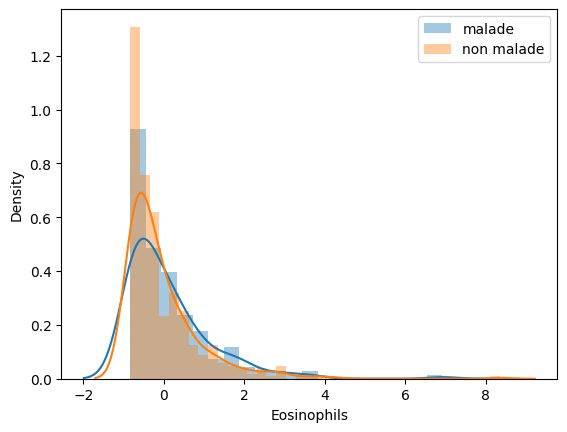

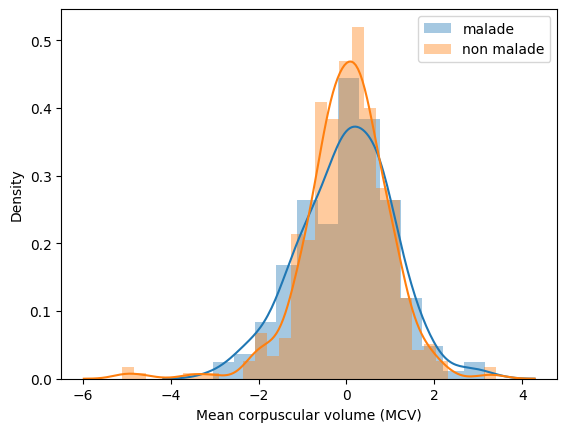

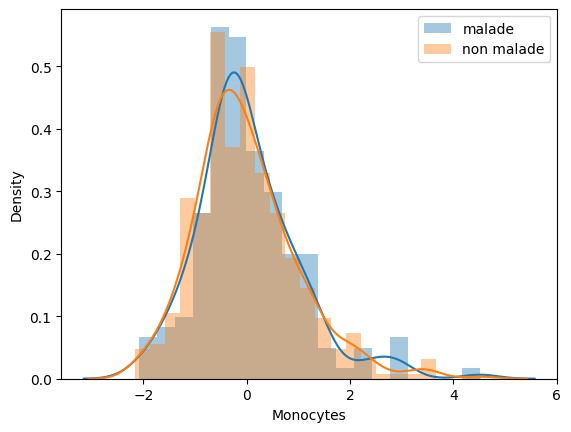

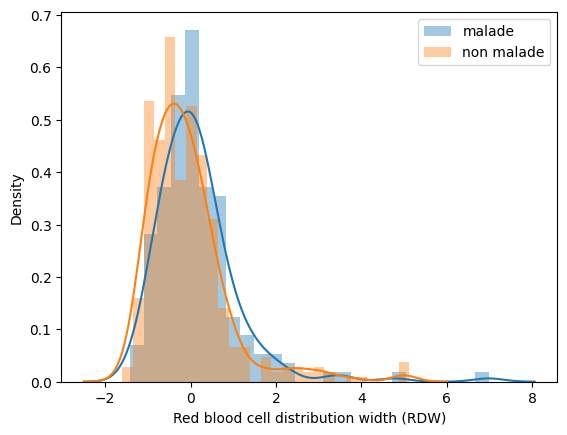

In [50]:
for col in blood_column:
    plt.figure()
    sns.distplot(malade_df[col],label='malade')
    sns.distplot(non_malade_df[col],label='non malade')
    plt.legend()

In [51]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillence'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi-intensive'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'soins intensive'
    else:
        return 'inconnu'

In [52]:
df['statut']=df.apply(hospitalisation,axis=1)

In [53]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\522847897.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat][col],label=cat)
C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\522847897.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut']==cat

KeyboardInterrupt: 

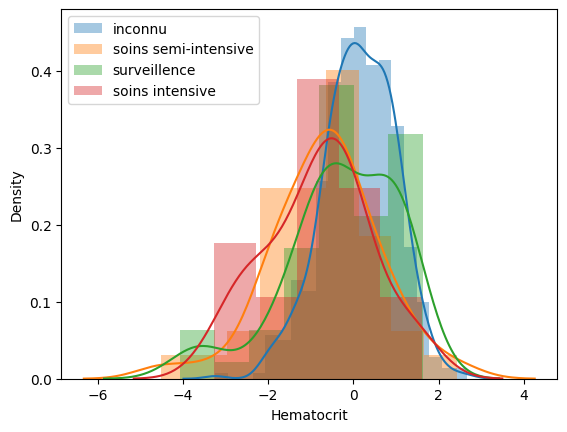

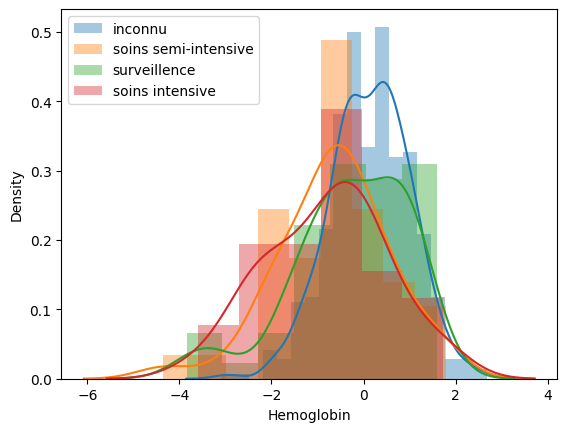

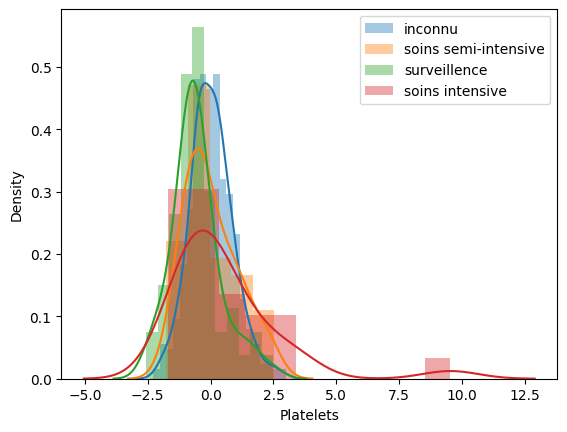

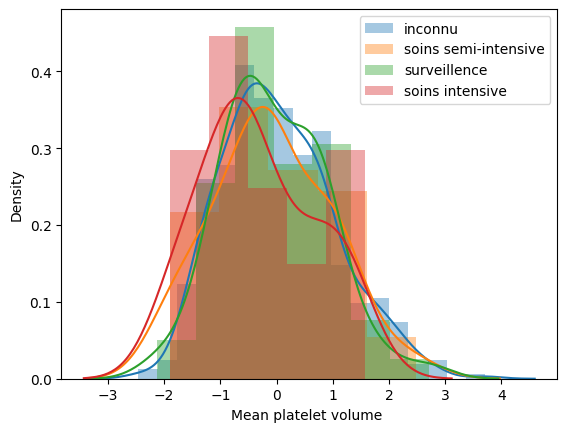

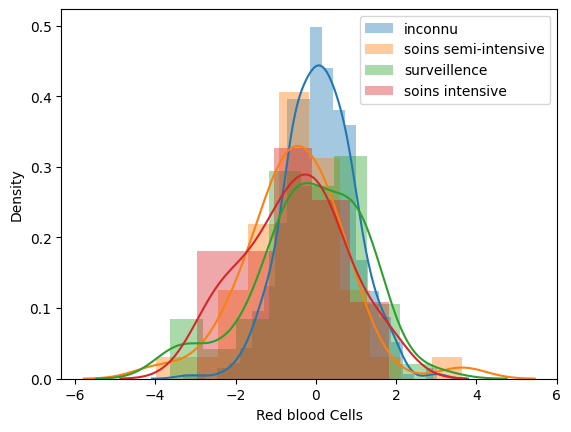

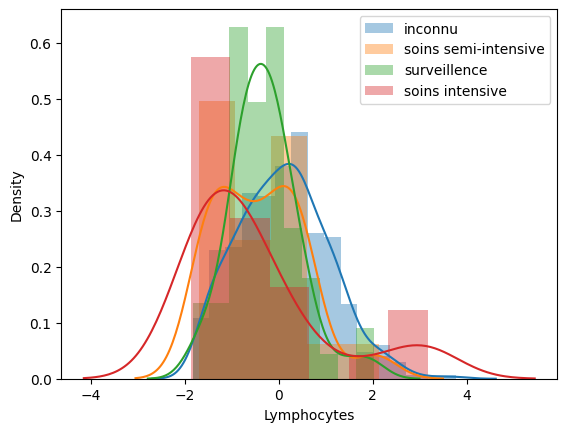

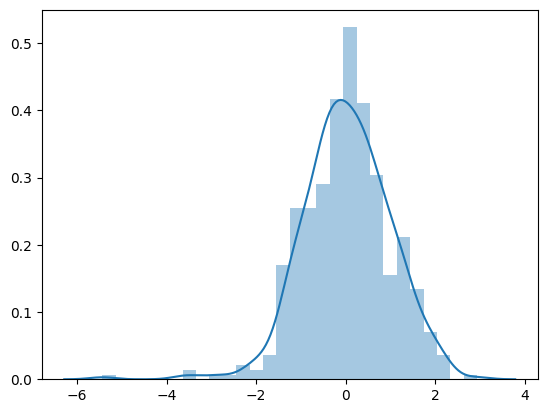

In [54]:
for col in blood_column:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col],label=cat)
    plt.legend()

In [55]:
blood_column

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [56]:
viral_column

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [59]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [60]:
df[blood_column].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [61]:
df[viral_column].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [62]:
df1=df[viral_column[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\3891081292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid']=df['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

In [63]:
df2=df[blood_column]
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_9096\47100161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid']=df['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

T-test
H0=les taux moyens(leuco,monocy,platele) sont eqaux chez les individus positive et negative

In [64]:
from scipy.stats import ttest_ind

In [65]:
positive_df.shape

(558, 38)

In [66]:
negative_df.shape

(5086, 38)

In [69]:
balanced_neg=negative_df.sample(positive_df.shape[0])

In [71]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p<alpha:
        return 'H0 rejeté'
    else:
        return 0
    

In [72]:
for col in blood_column:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 rejeté
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 rejeté
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 rejeté
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 rejeté
Red blood cell distribution width (RDW)----------- 0


Pre-Processing

In [142]:
df1=data.copy()

In [143]:
df1.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [144]:
missing_rate=df1.isna().sum()/df1.shape[0]

In [145]:
missing_rate
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

In [146]:
blood_column=df1.columns[(missing_rate<0.9) & (missing_rate>0.88)]
viral_column=df1.columns[(missing_rate<0.88) & (missing_rate>0.75)]
key_column=['Patient age quantile','SARS-Cov-2 exam result']

In [147]:
df1=df1[key_column + list(blood_column)+ list(viral_column)]
df1.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [82]:
from sklearn.model_selection import train_test_split

In [148]:
trainset,testset=train_test_split(df1,test_size=0.2,random_state=0)

In [149]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [150]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

Encode

In [151]:
code={
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
}

In [152]:
for col in df1.select_dtypes('object'):
    df1[col]=df1[col].map(code)

In [153]:
df1.head()

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13                       0         NaN         NaN   
1                    17                       0    0.236515    -0.02234   
2                     8                       0         NaN         NaN   
3                     5                       0         NaN         NaN   
4                    15                       0         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Respiratory Syncytial Virus  \
0                                      NaN                          NaN   
1                                -0.625073                          0.0   
2                                      NaN                          NaN   
3                                      NaN                          NaN   
4                                      NaN                          0.0   

   Influenza A  Influenza B  Parainfluenza 1  CoronavirusNL63  \
0          NaN          NaN              NaN              NaN   
1          0.0          0.0              0.0              0.0   
2          NaN          NaN              NaN              NaN   
3          NaN          NaN              NaN              NaN   
4          0.0          0.0              0.0              0.0   

   Rhinovirus/Enterovirus  Coronavirus HKU1  Parainfluenza 3  \
0                     NaN               NaN              NaN   
1                     1.0               0.0              0.0   
2                     NaN               NaN              NaN   
3                     NaN               NaN              NaN   
4                     1.0               0.0              0.0   

   Chlamydophila pneumoniae  Adenovirus  Parainfluenza 4  Coronavirus229E  \
0                       NaN         NaN              NaN              NaN   
1                       0.0         0.0              0.0              0.0   
2                       NaN         NaN              NaN              NaN   
3                       NaN         NaN              NaN              NaN   
4                       0.0         0.0              0.0              0.0   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  \
0              NaN              NaN                   NaN              NaN   
1              0.0              0.0                   0.0              0.0   
2              NaN              NaN                   NaN              NaN   
3              NaN              NaN                   NaN       

In [154]:
df1.dtypes.value_counts()

float64    33
int64       2
Name: count, dtype: int64

In [155]:
def encode(df):
    code={
    'positive':1,
    'negative':0,
    'detected':1,
    'not_detected':0
    }
    for col in df.select_dtypes('object'):
        df[col]=df[col].map(code)
    return df


In [163]:
def feature_engineering(df):
    df['est malade']=df[viral_column].sum(axis=1)>=1
    df=df.drop(viral_column,axis=1)
    return df

In [156]:
def imputation(df):
    # df['is na']=(df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    # df=df.fillna(-999)
    df=df.dropna(axis=0)
    return df

In [165]:
def preprocessing(df):
    df=encode(df)
    df=feature_engineering(df)
    df=imputation(df)
    X=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y

In [166]:
X_train,y_train=preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [167]:
X_test,y_test=preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


Modernization

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA

In [195]:
preprocessor=make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

In [196]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())


In [199]:
dict_models={
    'RandomForest':RandomForest,
    'AdaBoost':AdaBoost,
    'SVM':SVM,
    'KNN':KNN
    
}

procedure of evaluation

In [100]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [136]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))

    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train_score')
    plt.plot(N,val_score.mean(axis=1),label='validation_score')
    plt.legend()
    

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

AdaBoost
[[90  5]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.55      0.38      0.44        16

    accuracy                           0.86       111
   macro avg       0.72      0.66      0.68       111
weighted avg       0.85      0.86      0.85       111

SVM
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73  

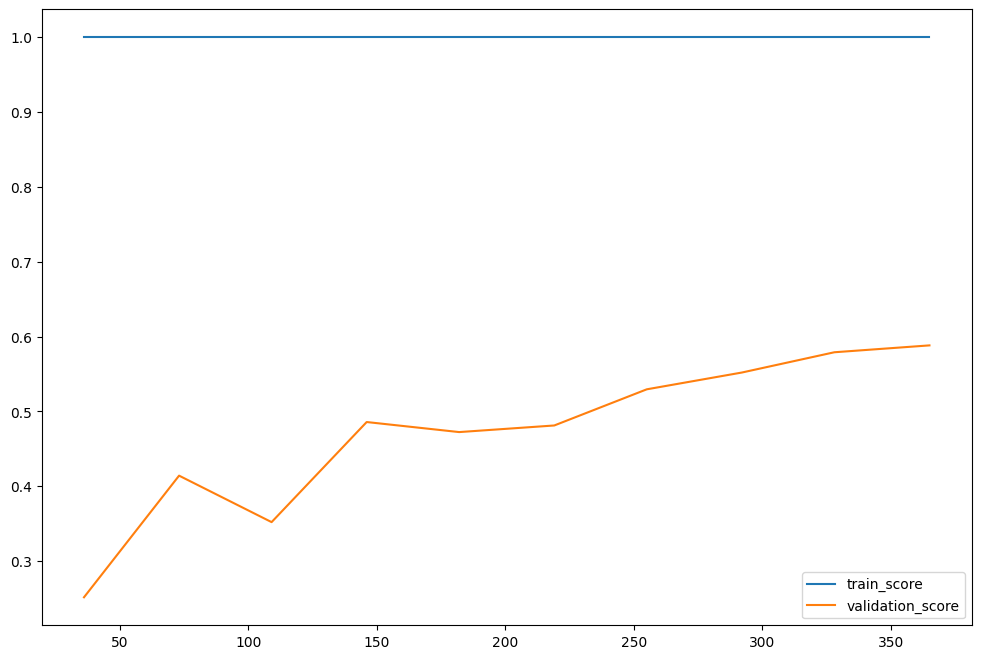

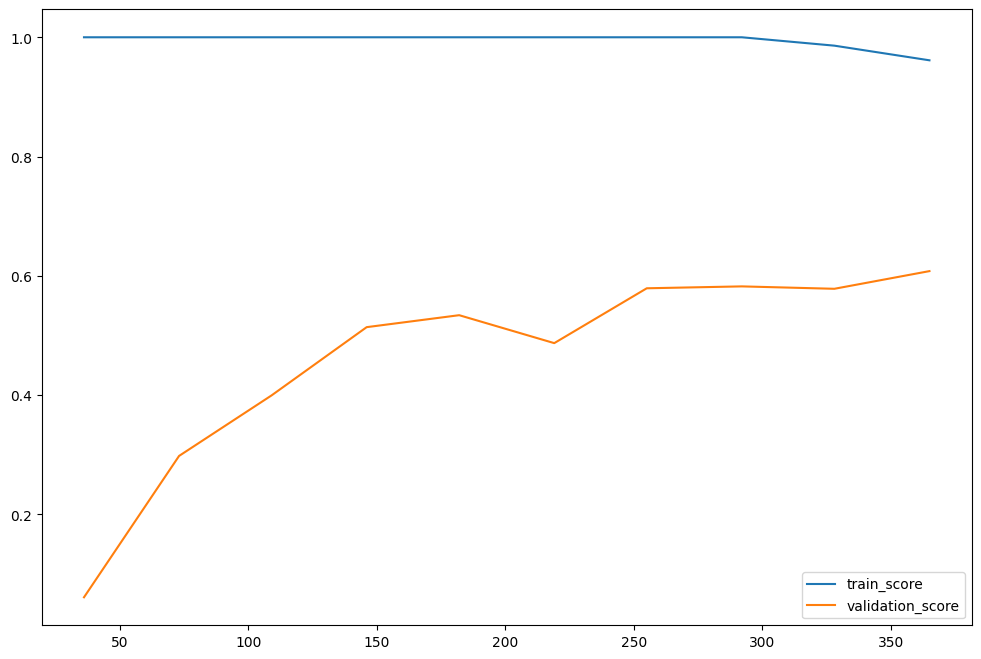

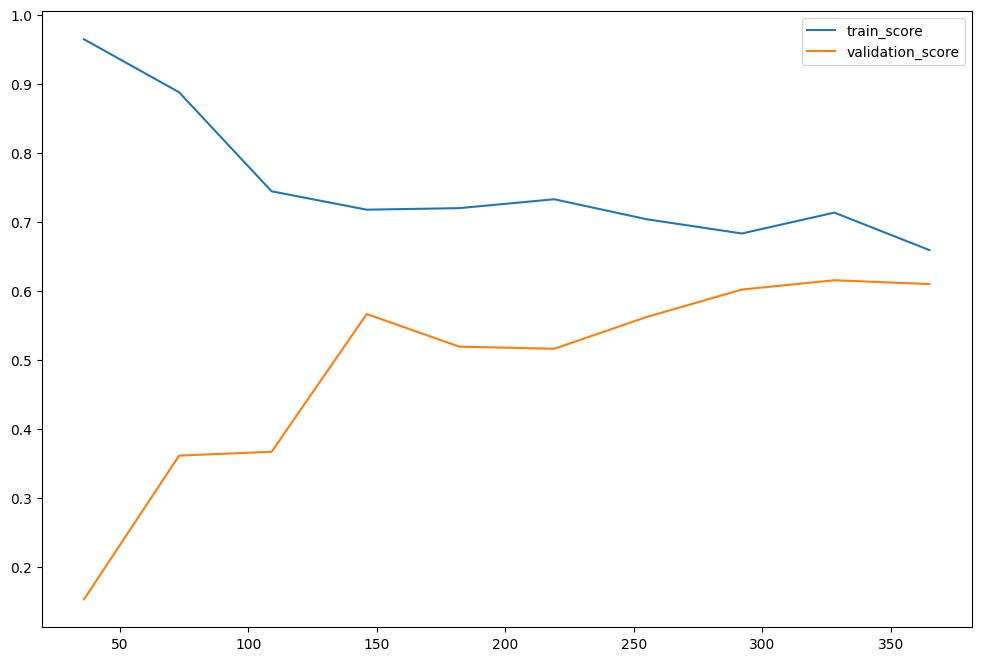

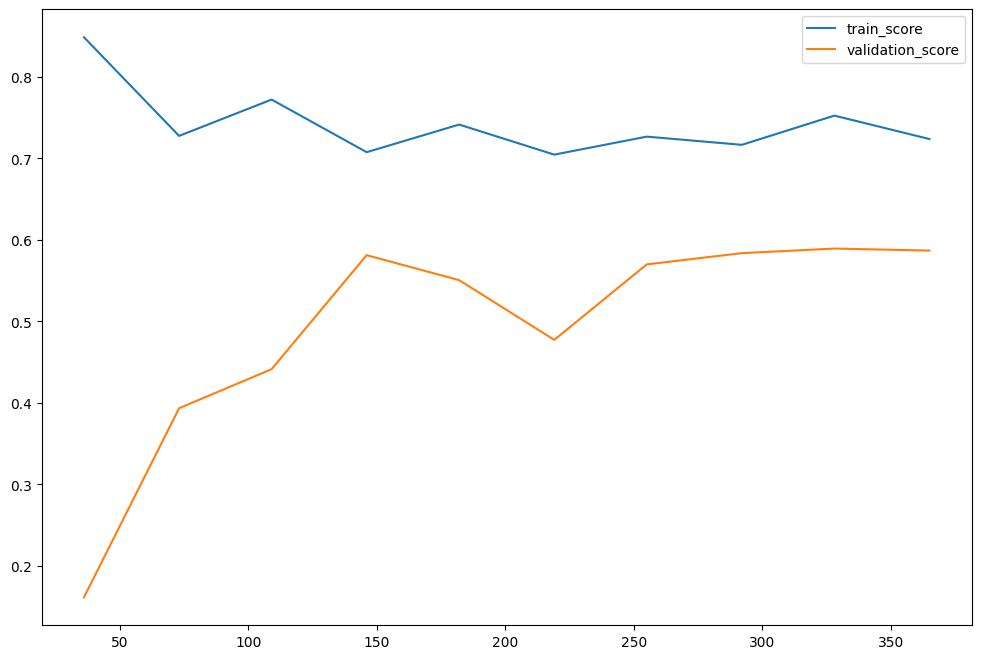

In [200]:
for name,model in  dict_models.items():
    print(name)
    evaluation(model)

C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111



C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selectio

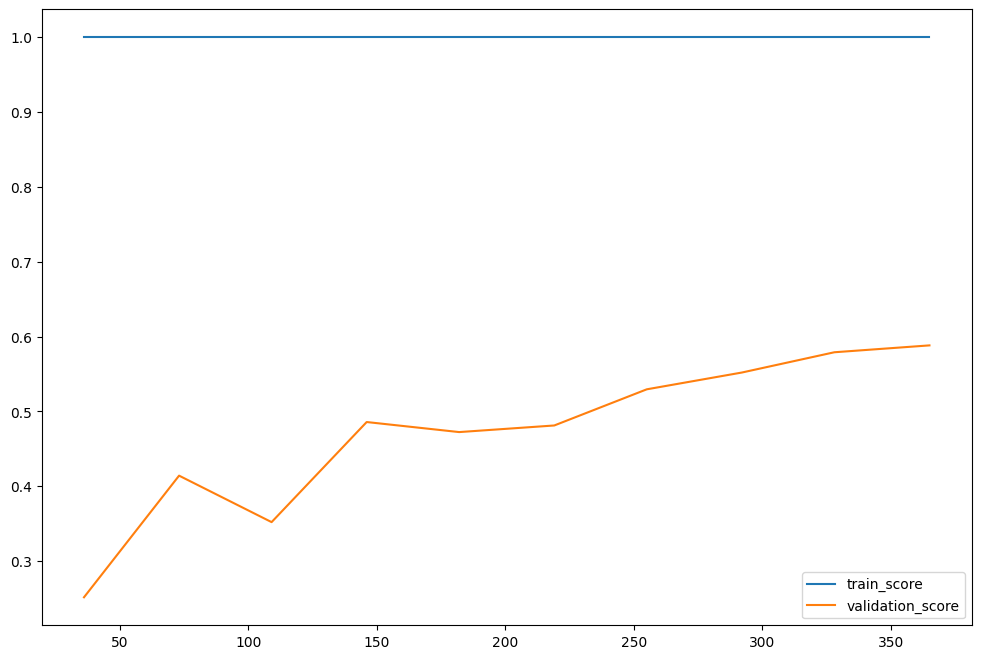

In [187]:
evaluation(model)

Optimization

In [213]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [204]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [214]:
hyper_params={
    'svc__gamma':[1e-3,1e-4],
    'svc__C':[1,10,100,1000],
    'pipeline__polynomialfeatures__degree':[2,3,4],
    'pipeline__selectkbest__k':range(4,100)
}

In [217]:
grid=RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=100)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 21, 'pipeline__polynomialfeatures__degree': 3}
0.7086397058823529
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.45      0.31      0.37        16

    accuracy                           0.85       111
   macro avg       0.67      0.62      0.64       111
weighted avg       0.83      0.85      0.83       111



[[89  6]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.45      0.31      0.37        16

    accuracy                           0.85       111
   macro avg       0.67      0.62      0.64       111
weighted avg       0.83      0.85      0.83       111



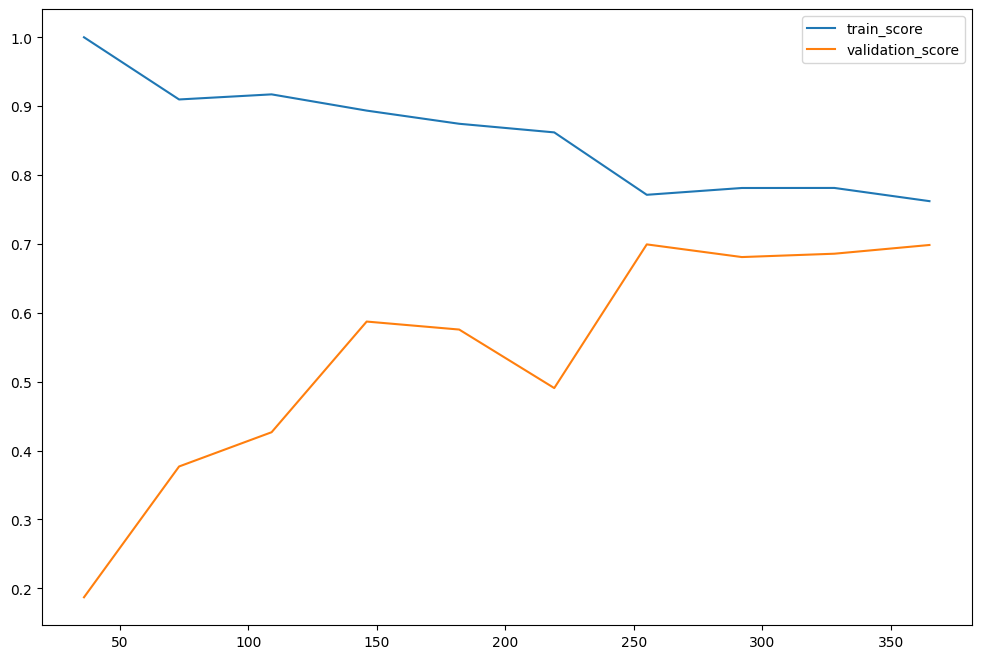

In [218]:
evaluation(grid.best_estimator_)

Precision recall curve

In [219]:
from sklearn.metrics import precision_recall_curve

In [222]:
precision,recall,threshold= precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

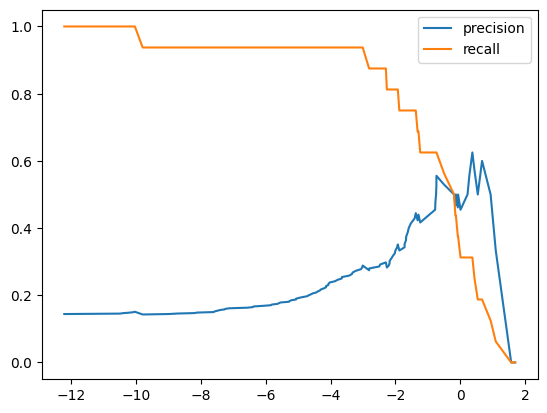

In [225]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [226]:
def model_final(model,X,threshold=0):
    return model.decision_function(X)>threshold

In [227]:
y_pred=model_final(grid.best_estimator_,X_test,threshold=-0.2)

In [228]:
f1_score(y_test,y_pred)

0.5

In [229]:
from sklearn.metrics import recall_score

In [230]:
recall_score(y_test,y_pred)

0.5